In [18]:
#패키지 불러오기
import pandas as pd # 데이터 처리
import numpy as np #연산
import matplotlib #시각화
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import copy
from sklearn.model_selection import train_test_split # 데이터 분할 : train, test
from statsmodels.formula.api import ols # 회귀분석
from statsmodels.api import qqplot, add_constant #회귀분석 상수항 추가
import statsmodels.formula.api as smf # 회귀분석
from sklearn.tree import DecisionTreeRegressor # 예측/회귀 Decision Tree
from sklearn.ensemble import RandomForestRegressor #예측/회귀
from sklearn.ensemble import GradientBoostingRegressor #예측/회귀
from sklearn.linear_model import LinearRegression #분산 팽창계수 계산할때 사용
from sklearn.feature_selection import RFE #후진제거법(변수선택)
from sklearn.preprocessing import StandardScaler #표준화 회귀계수 산출(scale 변환)
from statsmodels.tools.eval_measures import rmse # 평가함수
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn import tree

from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.outliers_influence import variance_inflation_factor #다중공산성 확인
import math

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


import graphviz # 나무구조 시각화
from sklearn.tree import export_graphviz

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import metrics

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import datetime

#로지스틱 회귀
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
# scaling
from sklearn.preprocessing import StandardScaler
# 분류 SVM
from sklearn.svm import SVC
# 분류 NN (MLPClassifier)
from sklearn.neural_network import MLPClassifier
# 분류 KNN
from sklearn.neighbors import KNeighborsClassifier
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')
import matplotlib.font_manager as fm
path ='/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc'
fontprop = fm.FontProperties(fname=path, size=18).get_name()
#한글과 음수표시
matplotlib.rc('font',family=fontprop)
matplotlib.rc('axes',unicode_minus=False)

In [3]:
df.head()

,Unnamed: 0,index,datetime,TAG_001,TAG_002,TAG_004,TAG_005,TAG_006,TAG_007,TAG_008,...,TAG_185,TAG_186,TAG_187,TAG_188,TAG_189,TAG_190,TAG_191,TAG_192,TAG_193,cause
0,0,473767,2021-11-28 13:40:00,14.192563,3.793609,3.862716,214.880203,42.049050,0.0,0.0,...,40.034354,40.100808,39.803909,39.580745,0.080869,0.144834,0.096604,0.124095,78.272322,정상
1,1,473768,2021-11-28 13:41:00,14.192656,3.796596,3.863554,214.873420,42.052323,0.0,0.0,...,40.034929,40.022729,37.898259,38.529732,0.082313,0.144649,0.096641,0.124187,78.230208,정상
2,2,473769,2021-11-28 13:42:00,14.192749,3.799584,3.864392,214.866637,42.055596,0.0,0.0,...,40.035503,39.944650,36.791136,37.478719,0.083757,0.144464,0.096678,0.124278,78.186482,정상
3,3,473770,2021-11-28 13:43:00,14.192842,3.804065,3.865230,214.859854,42.058869,0.0,0.0,...,40.036077,39.866572,35.684666,37.848148,0.085200,0.144279,0.096715,0.124370,78.211963,정상
4,4,473771,2021-11-28 13:44:00,14.192934,3.818614,3.866069,214.853070,42.062141,0.0,0.0,...,40.036652,39.817232,34.941667,39.814037,0.086644,0.144094,0.096752,0.124461,78.282204,정상


In [5]:
#tag = df_raw.drop('datetime',axis=1,inplace=True)
df.head()

,Unnamed: 0,index,datetime,TAG_001,TAG_002,TAG_004,TAG_005,TAG_006,TAG_007,TAG_008,...,TAG_185,TAG_186,TAG_187,TAG_188,TAG_189,TAG_190,TAG_191,TAG_192,TAG_193,cause
0,0,473767,2021-11-28 13:40:00,14.192563,3.793609,3.862716,214.880203,42.049050,0.0,0.0,...,40.034354,40.100808,39.803909,39.580745,0.080869,0.144834,0.096604,0.124095,78.272322,정상
1,1,473768,2021-11-28 13:41:00,14.192656,3.796596,3.863554,214.873420,42.052323,0.0,0.0,...,40.034929,40.022729,37.898259,38.529732,0.082313,0.144649,0.096641,0.124187,78.230208,정상
2,2,473769,2021-11-28 13:42:00,14.192749,3.799584,3.864392,214.866637,42.055596,0.0,0.0,...,40.035503,39.944650,36.791136,37.478719,0.083757,0.144464,0.096678,0.124278,78.186482,정상
3,3,473770,2021-11-28 13:43:00,14.192842,3.804065,3.865230,214.859854,42.058869,0.0,0.0,...,40.036077,39.866572,35.684666,37.848148,0.085200,0.144279,0.096715,0.124370,78.211963,정상
4,4,473771,2021-11-28 13:44:00,14.192934,3.818614,3.866069,214.853070,42.062141,0.0,0.0,...,40.036652,39.817232,34.941667,39.814037,0.086644,0.144094,0.096752,0.124461,78.282204,정상


In [7]:
df['cause'].unique()

array(['정상', '불량중지'], dtype=object)

<AxesSubplot:xlabel='TAG_004', ylabel='cause'>

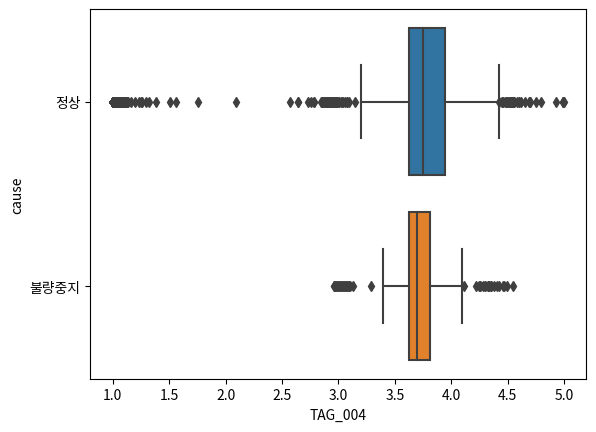

In [9]:
sns.boxplot(df['TAG_004'],df['cause'])

In [10]:
df.drop('Unnamed: 0',axis=1, inplace=True)
df.drop('index',axis=1, inplace=True)

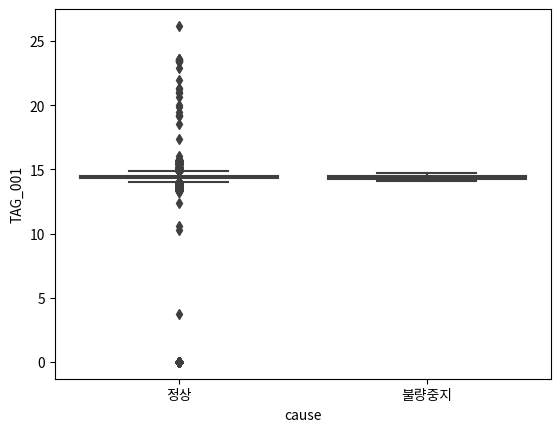

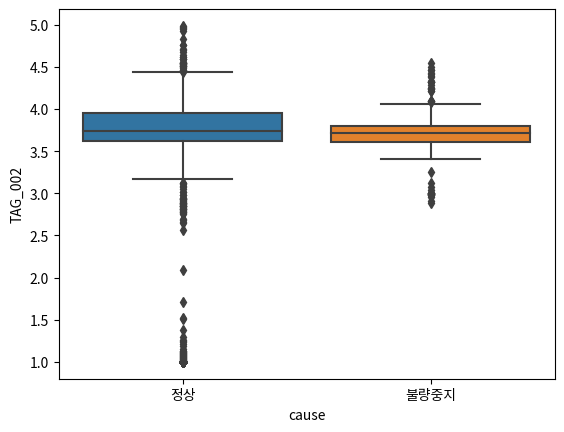

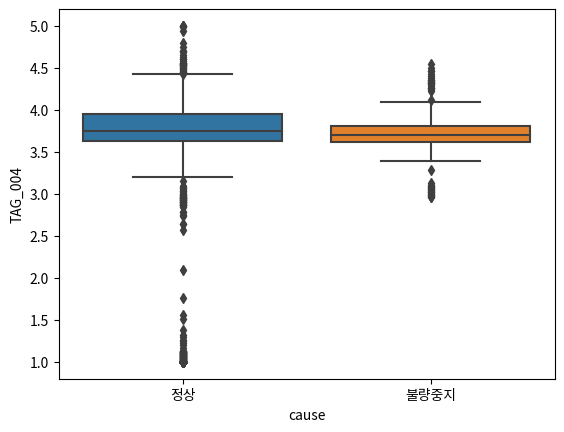

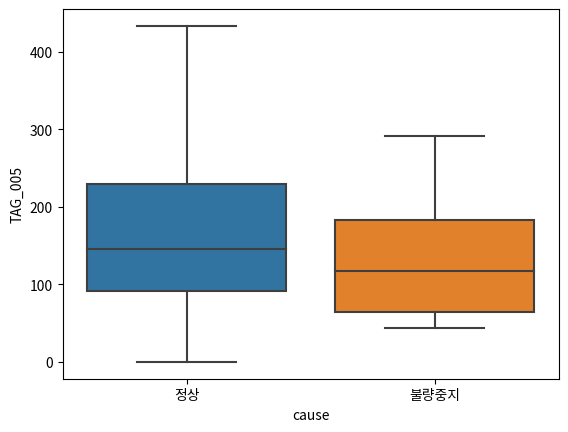

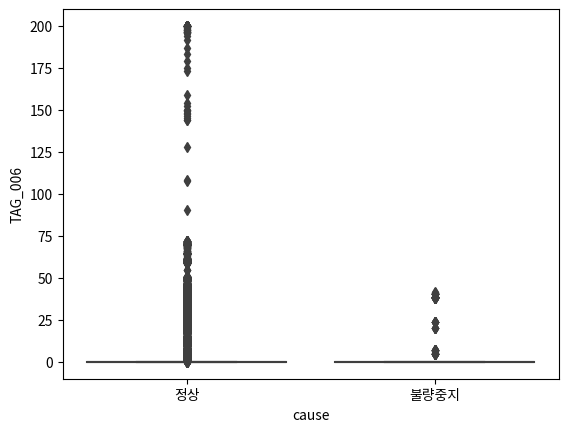

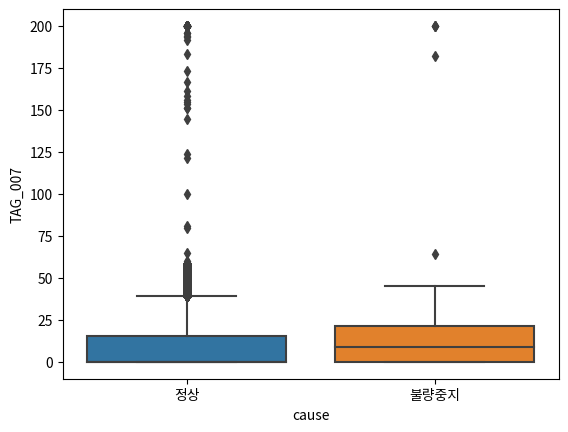

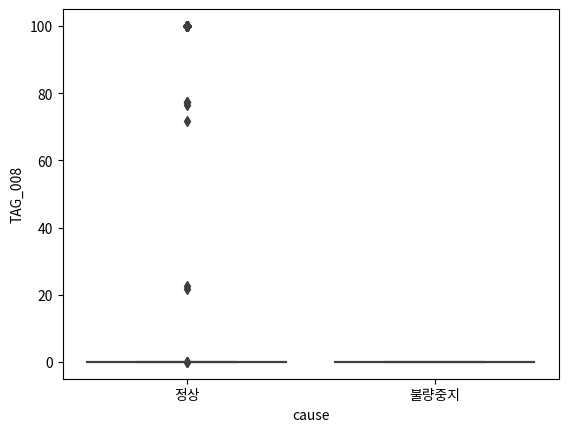

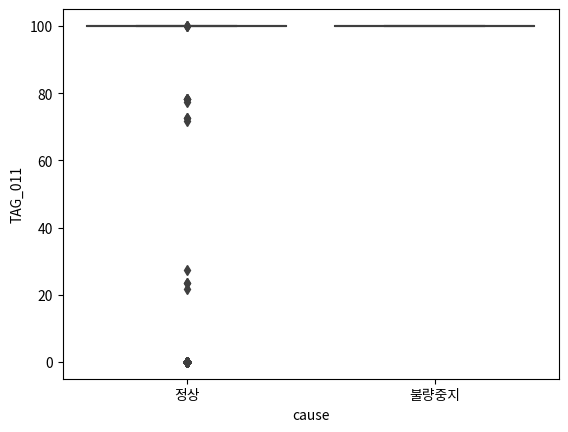

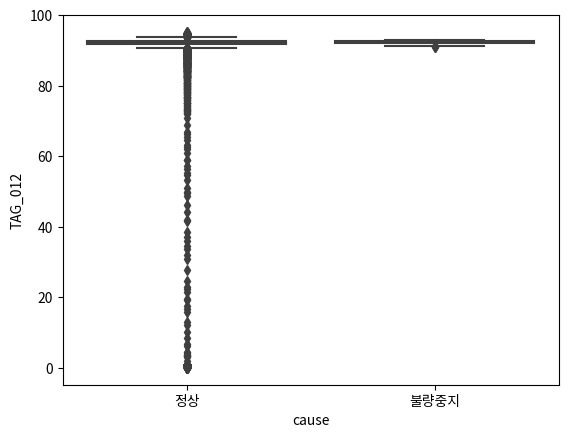

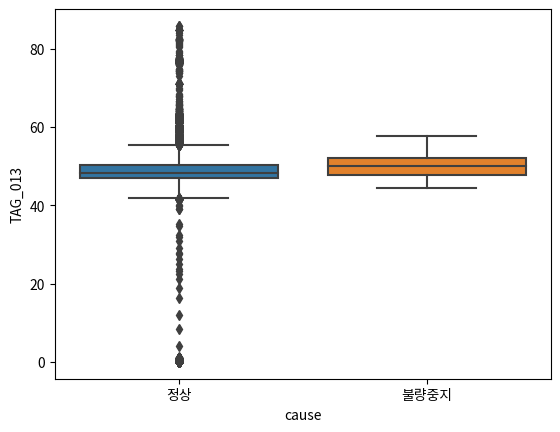

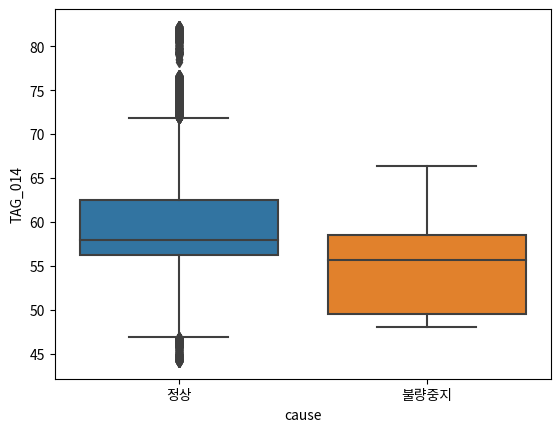

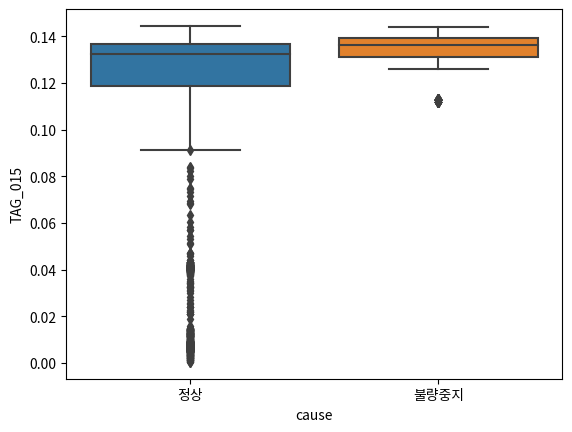

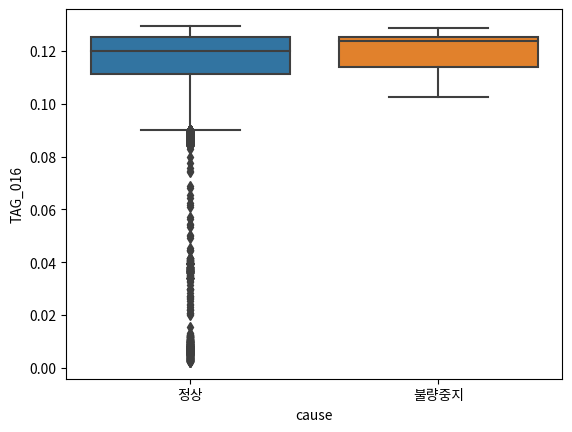

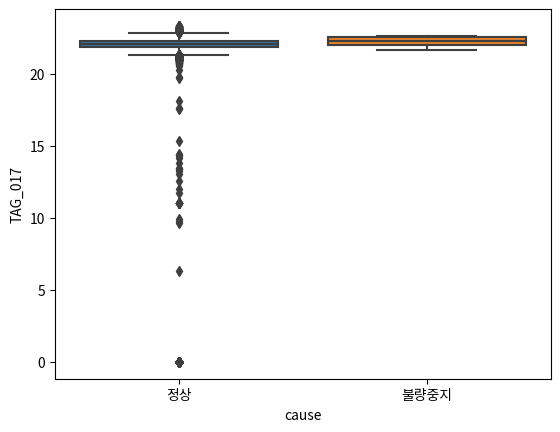

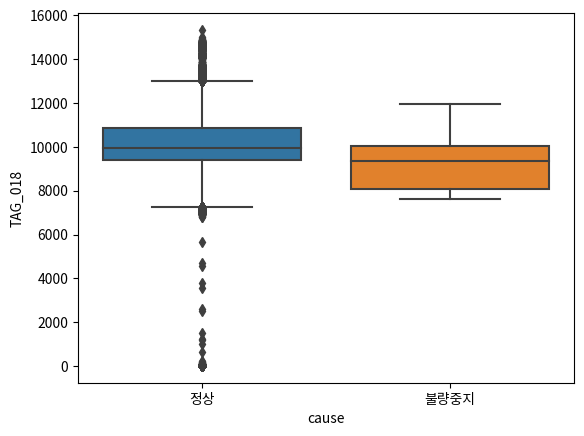

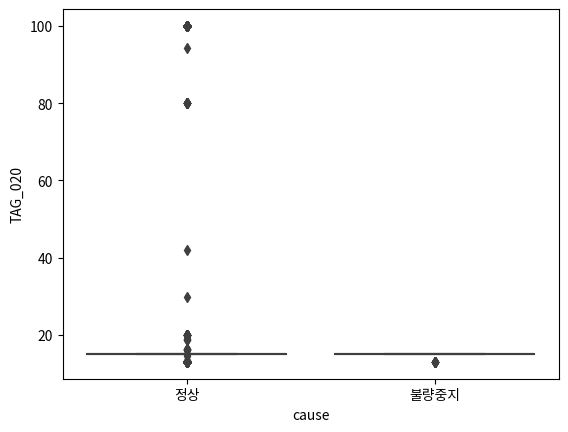

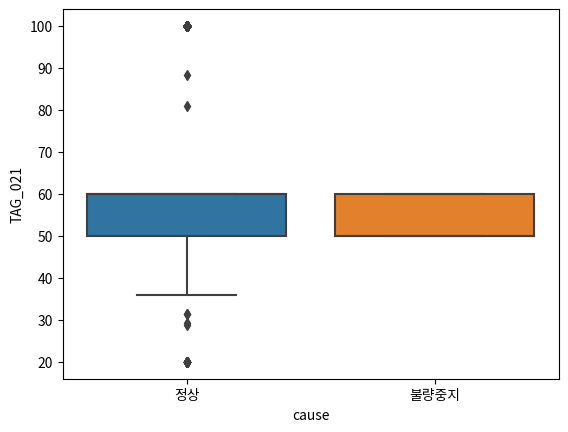

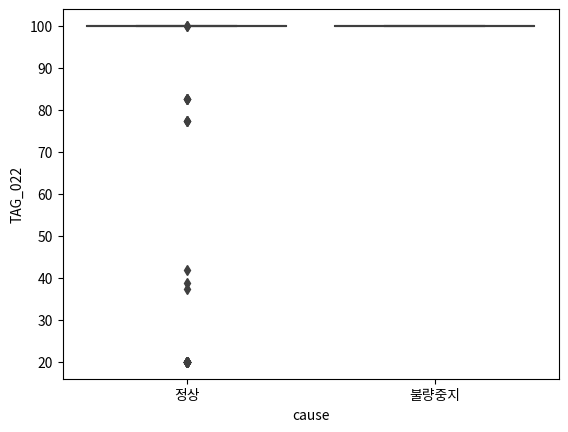

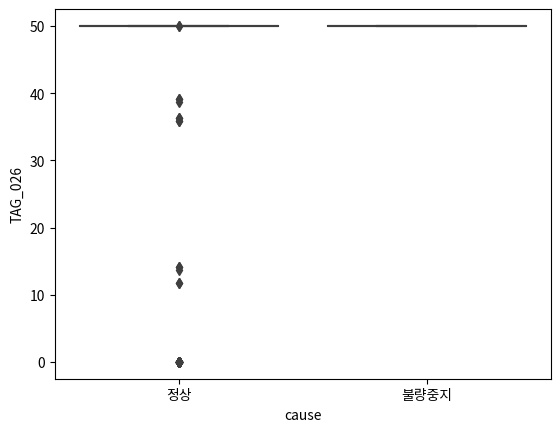

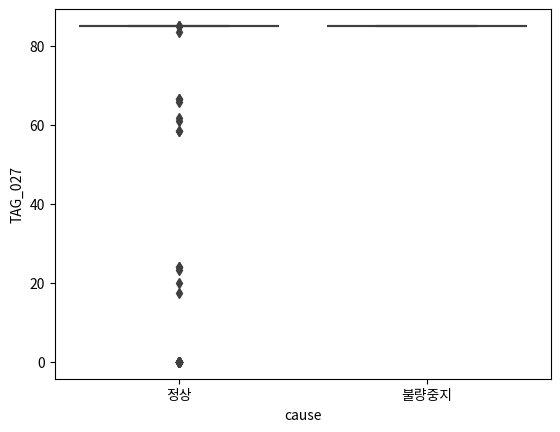

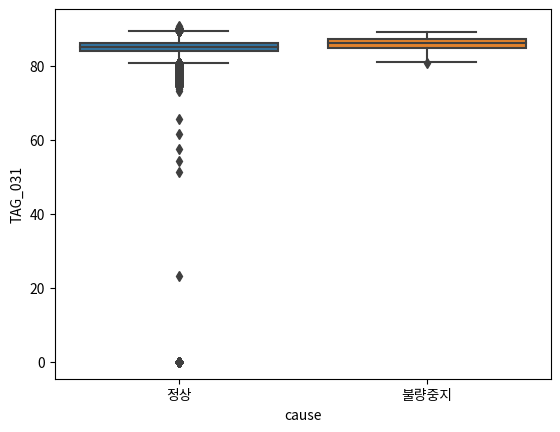

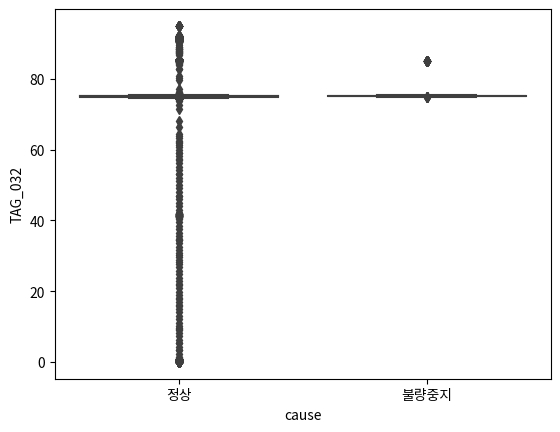

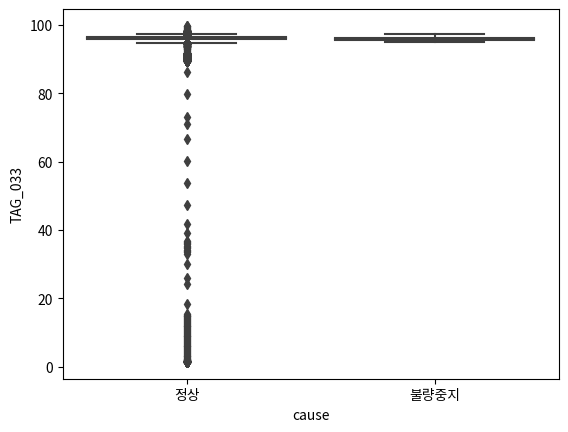

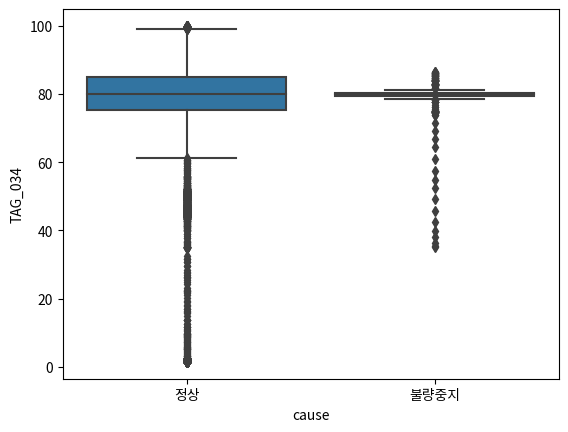

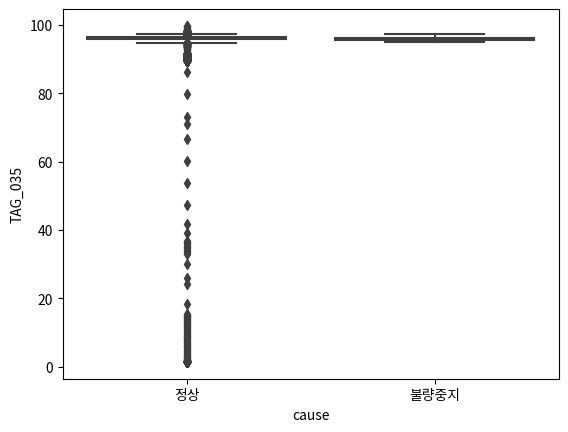

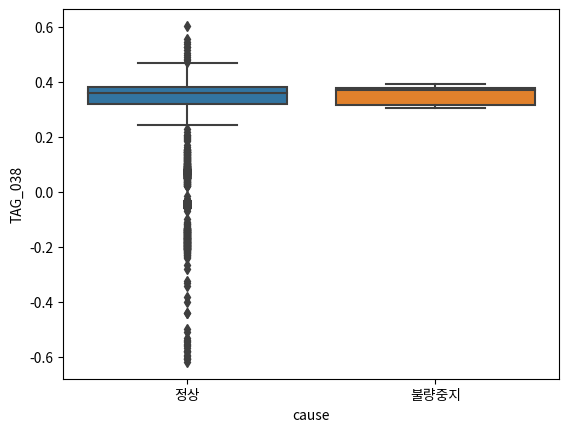

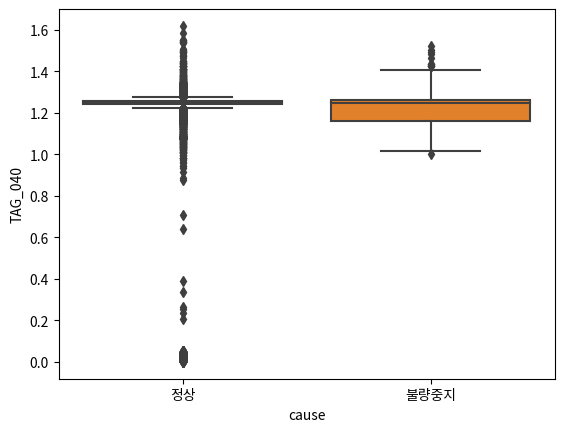

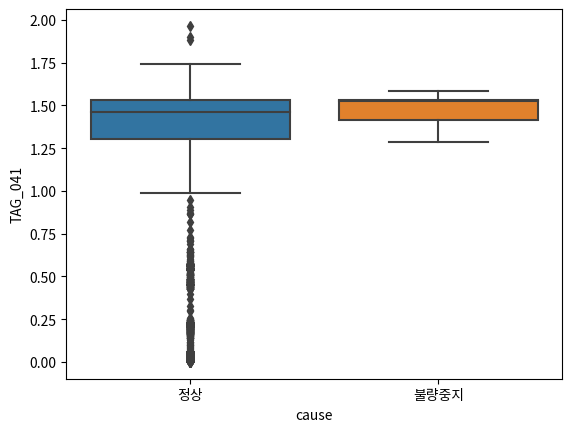

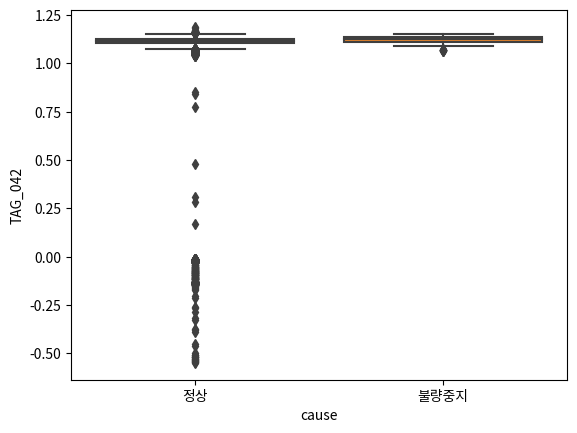

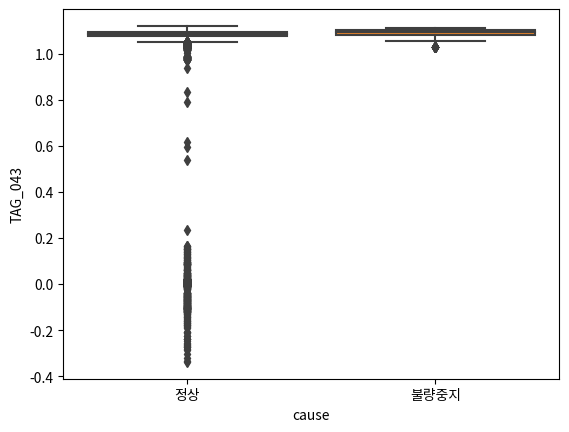

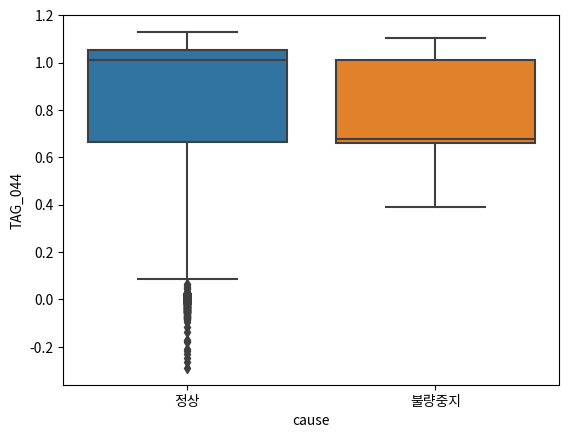

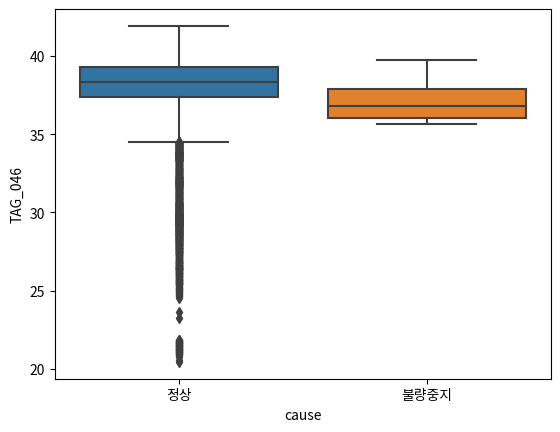

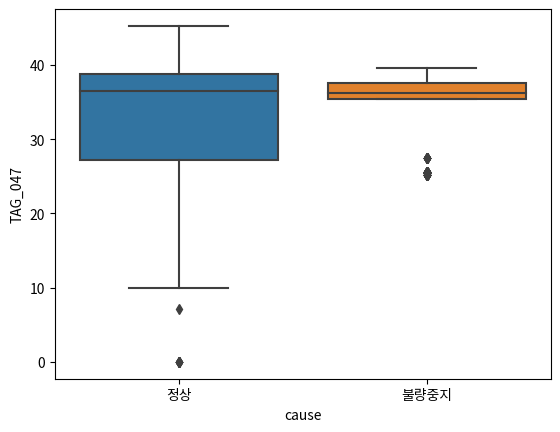

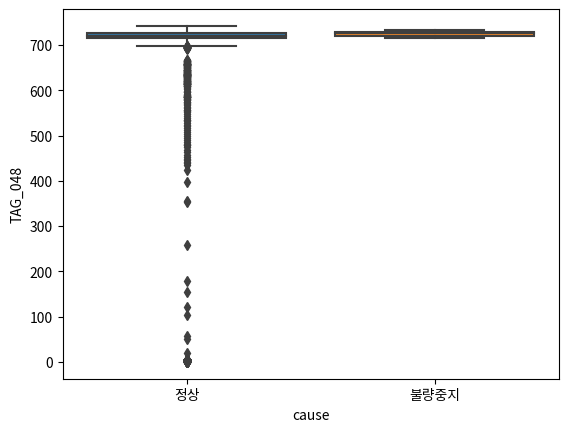

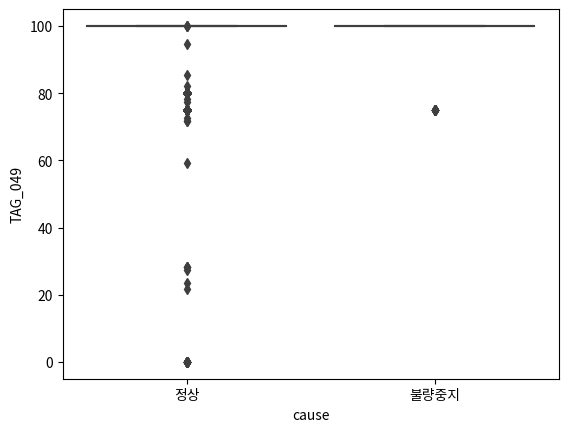

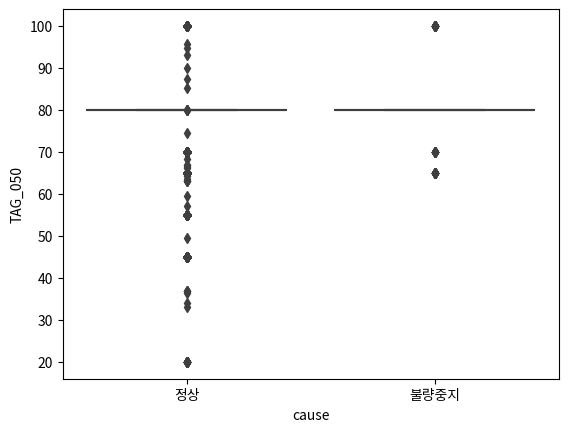

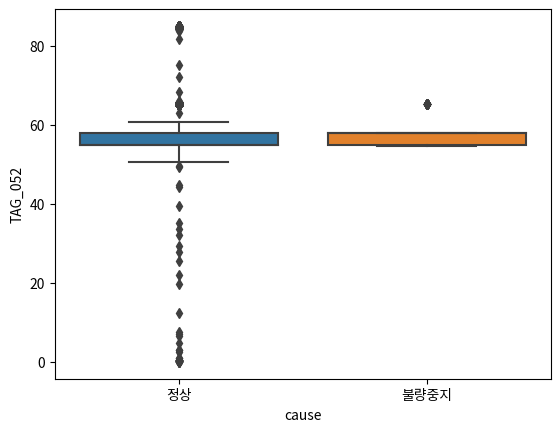

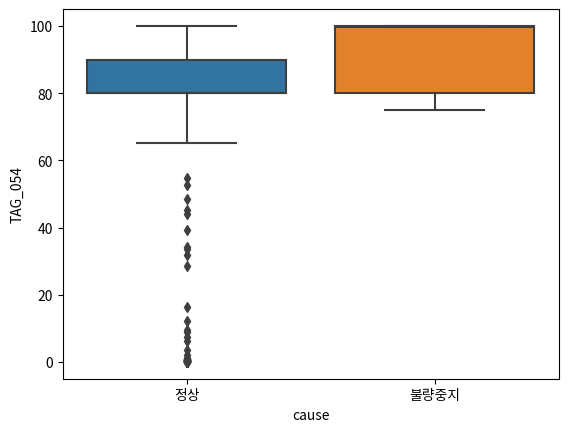

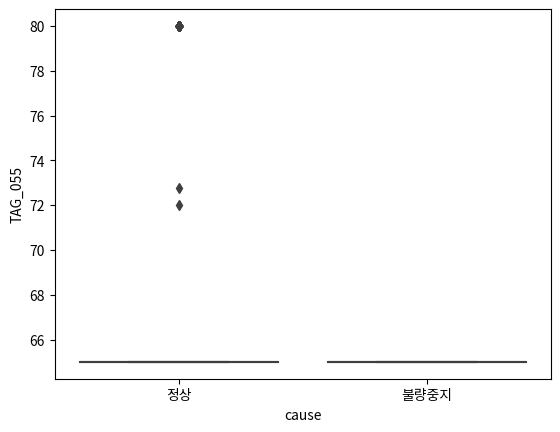

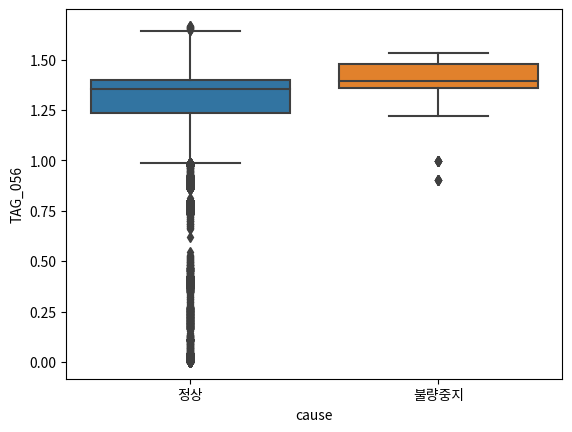

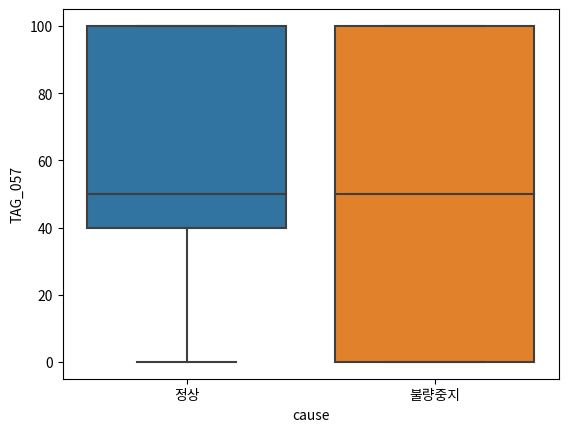

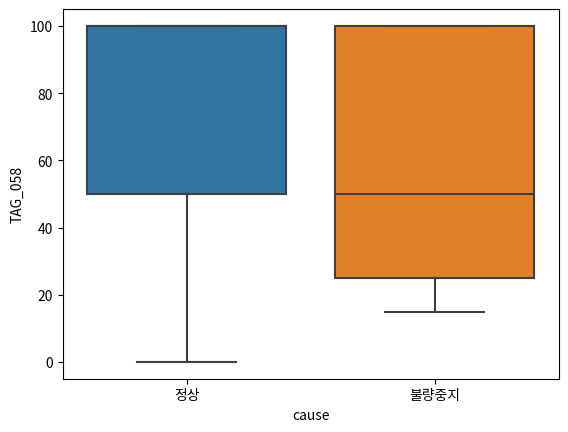

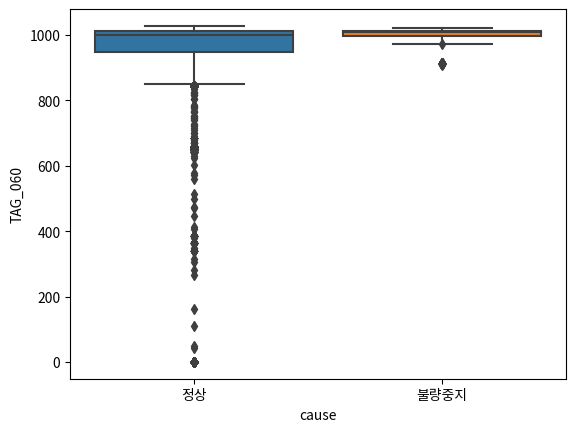

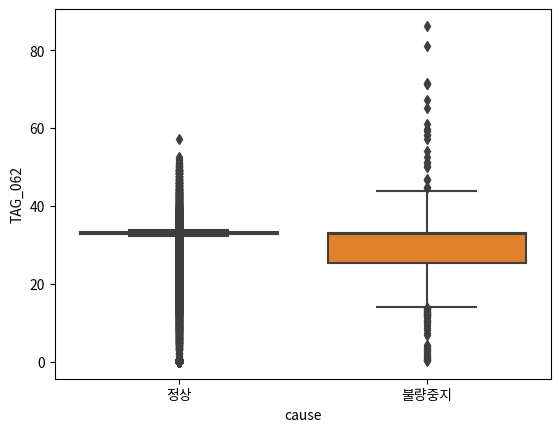

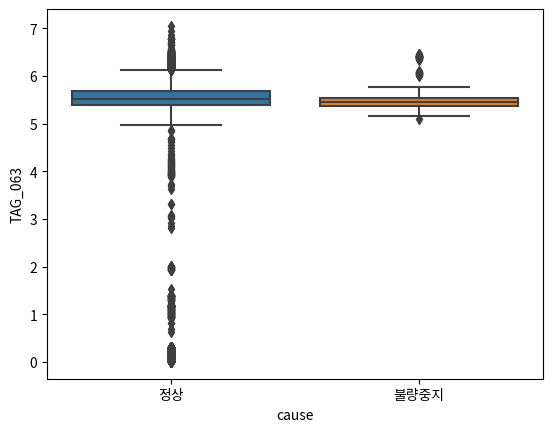

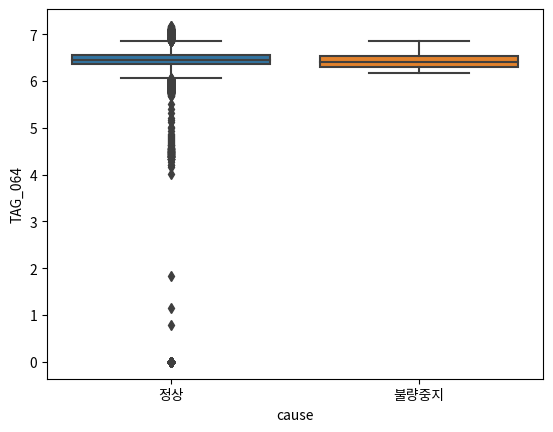

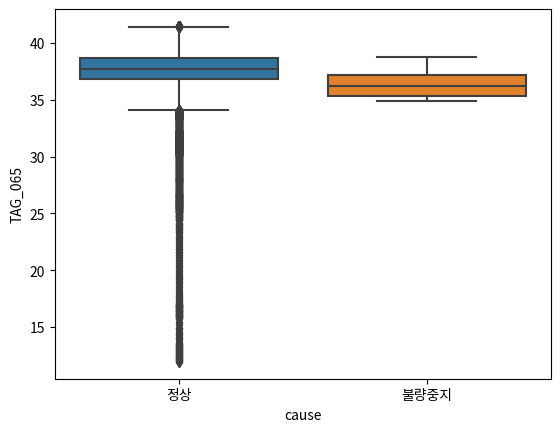

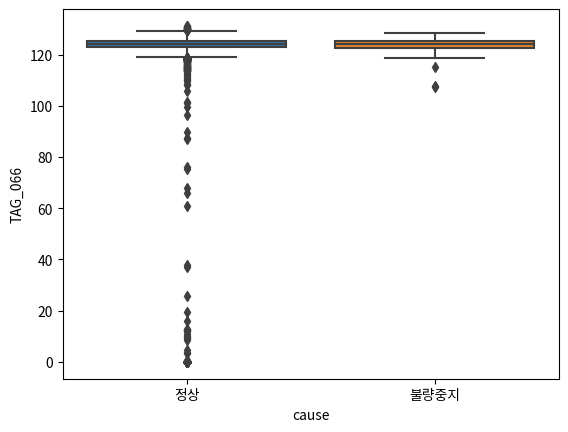

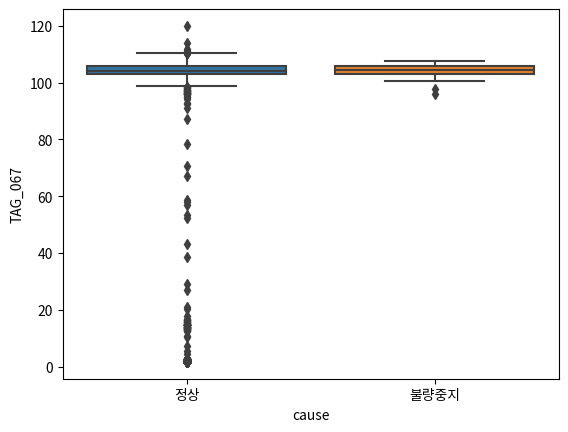

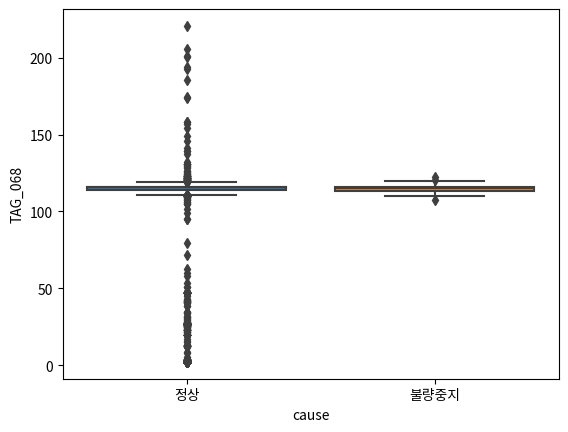

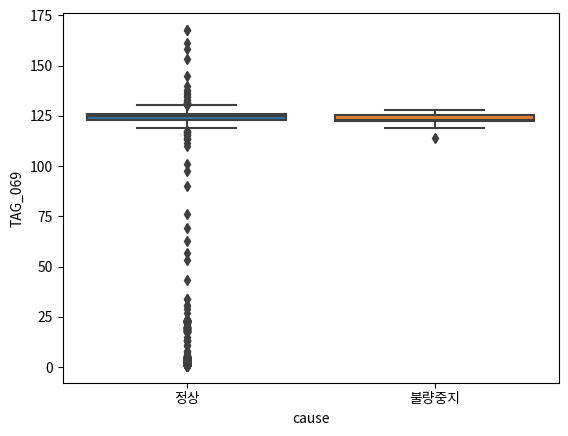

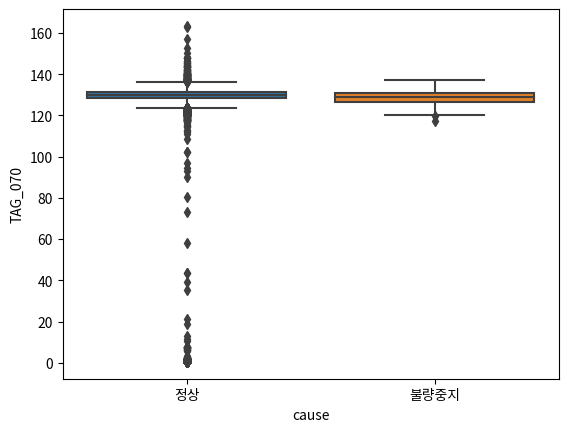

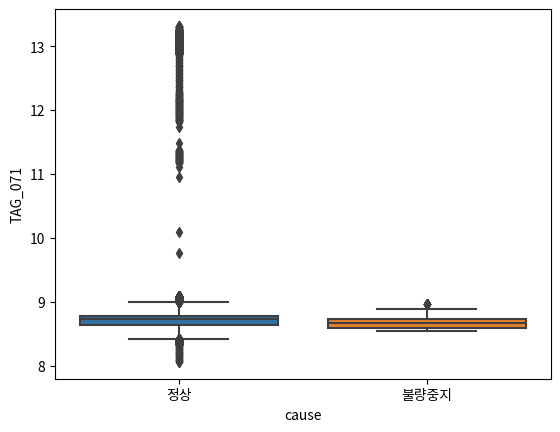

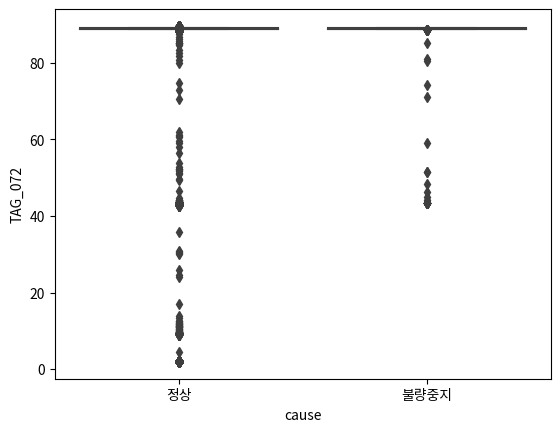

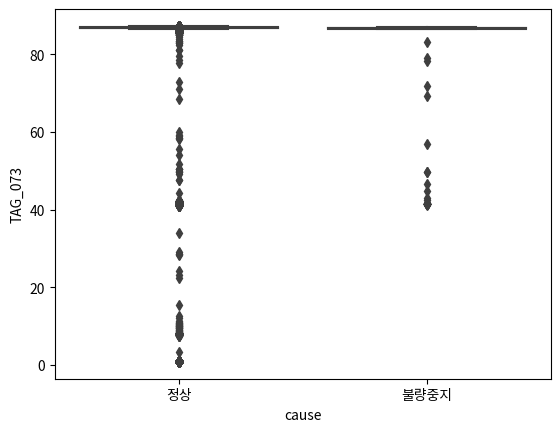

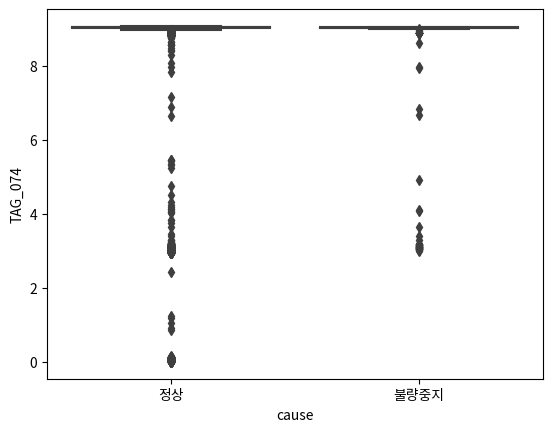

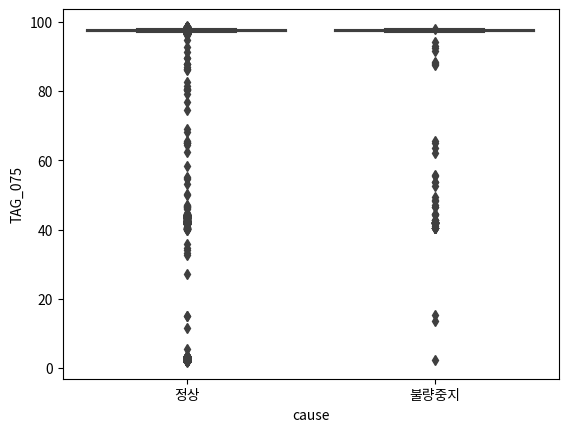

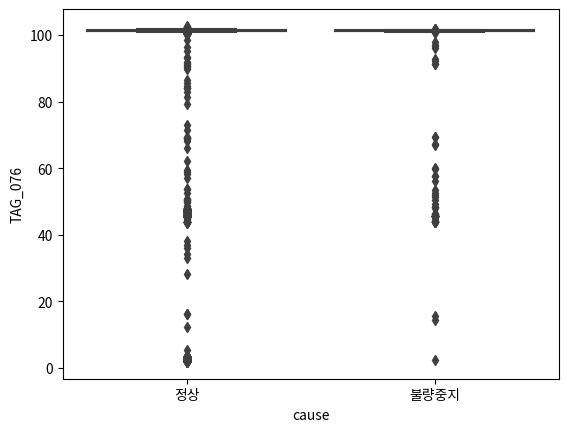

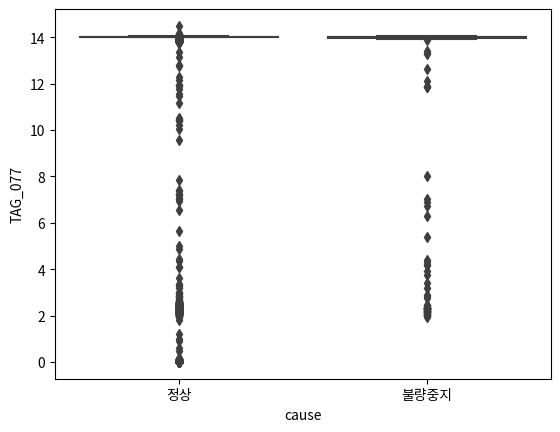

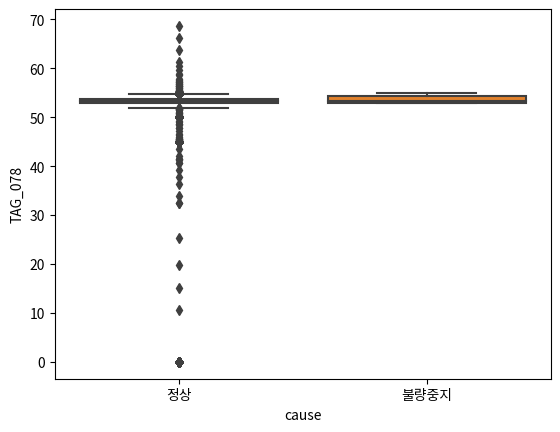

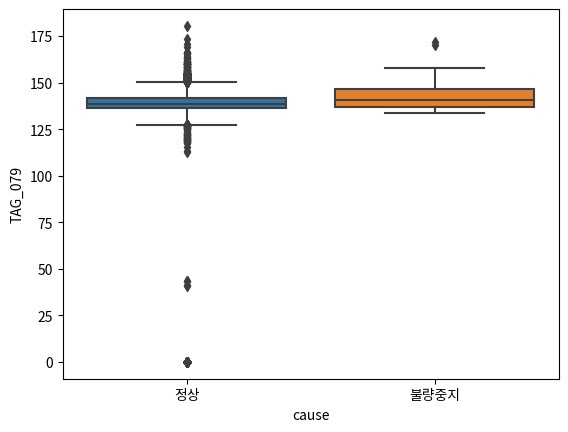

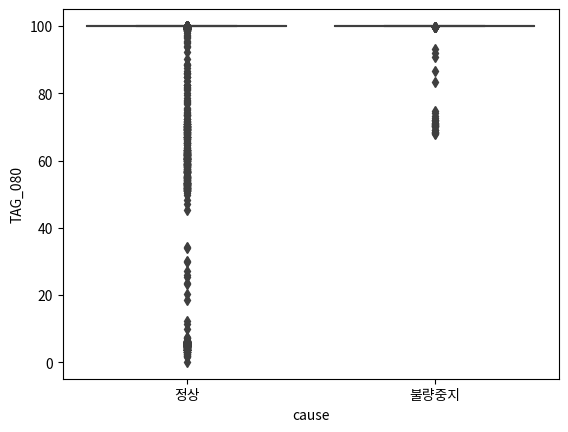

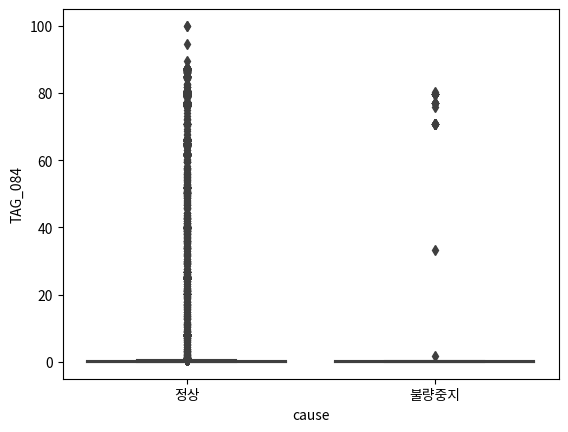

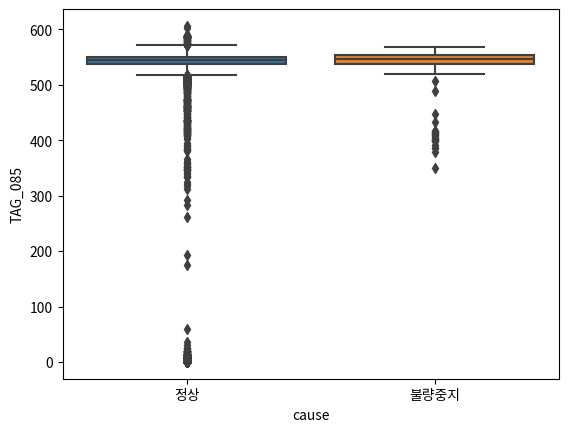

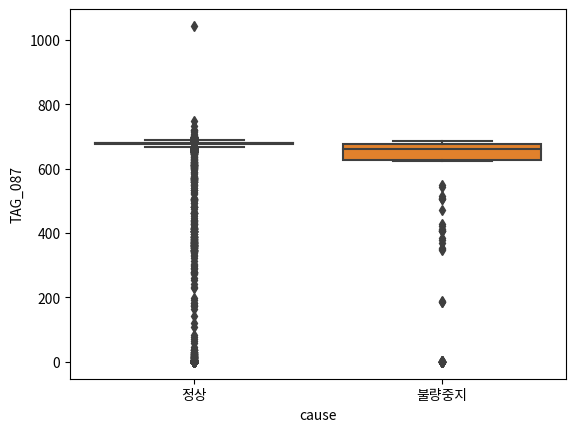

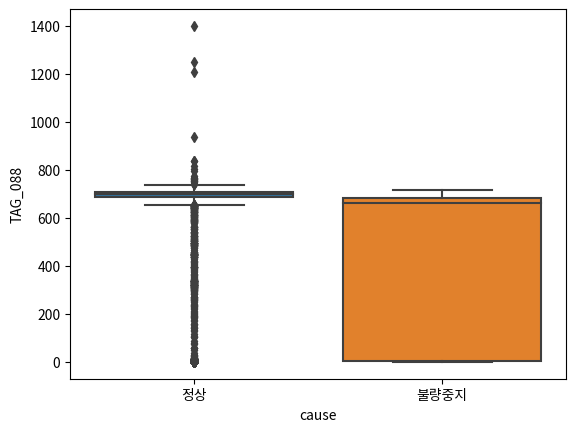

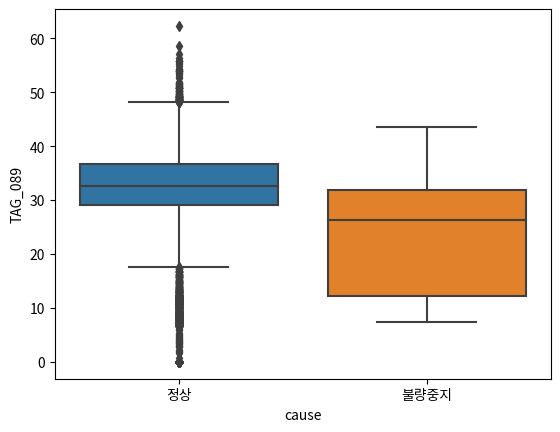

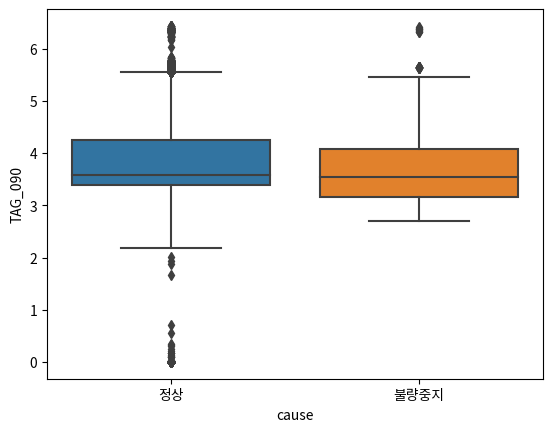

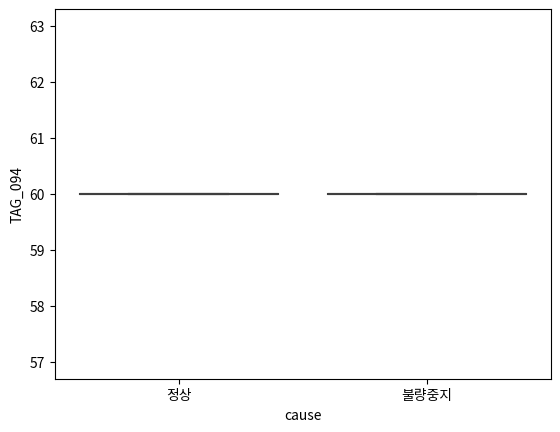

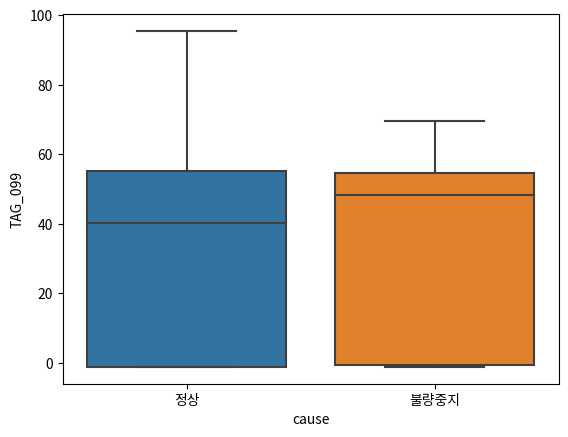

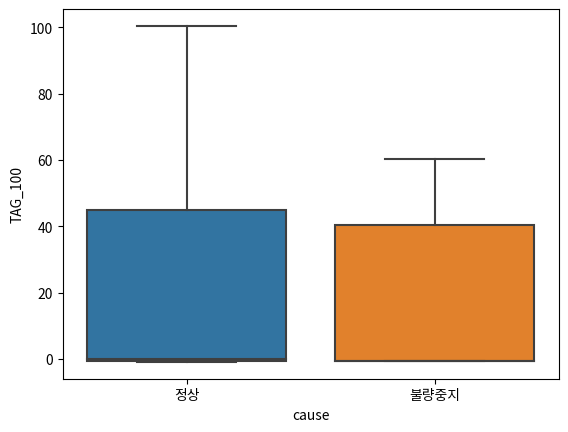

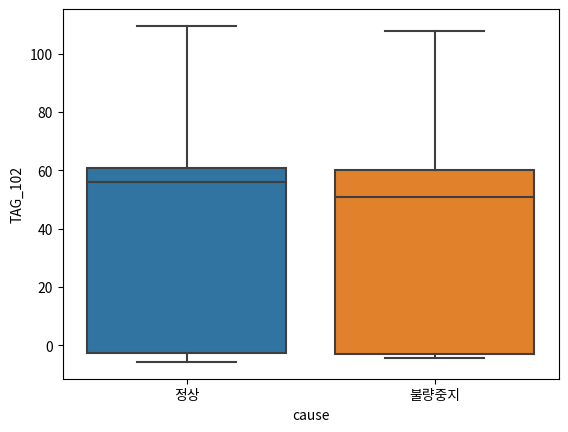

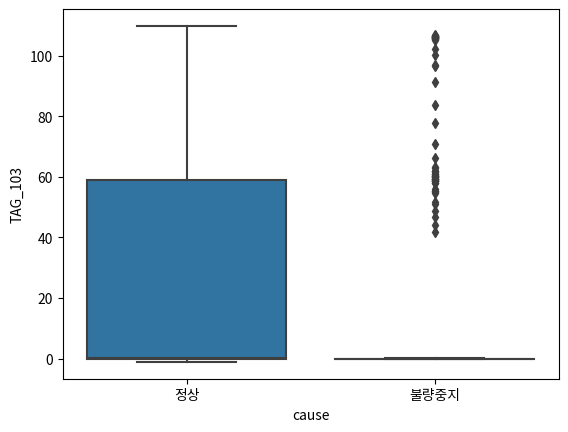

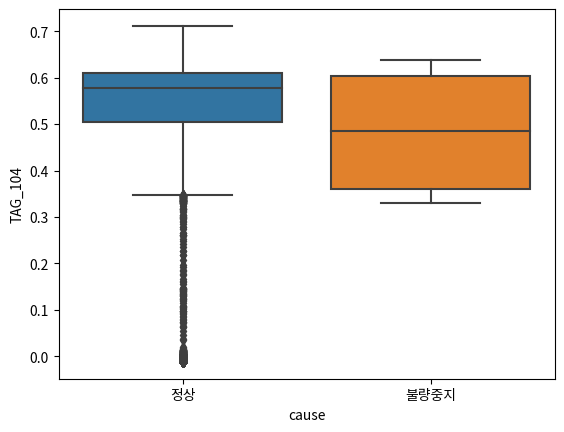

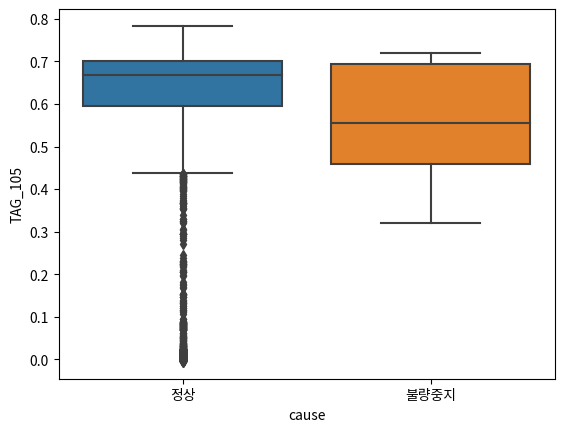

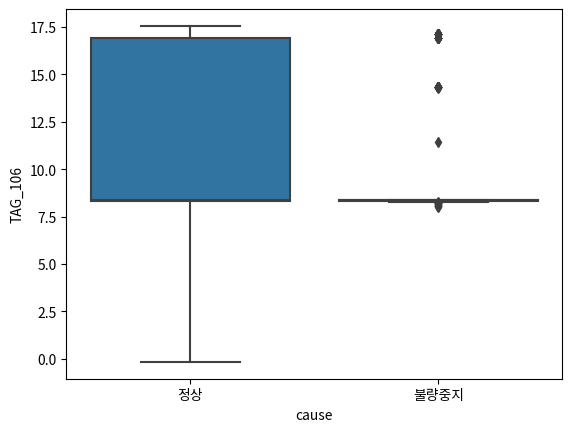

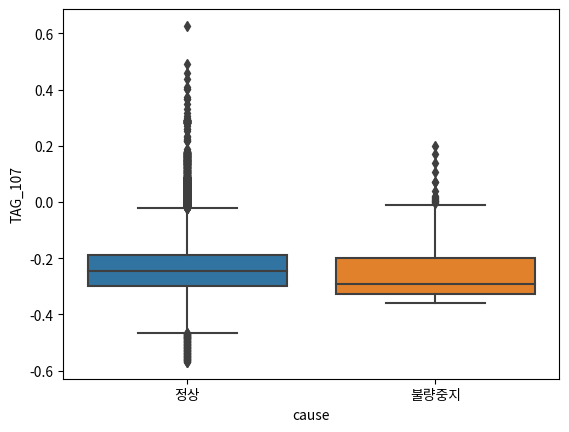

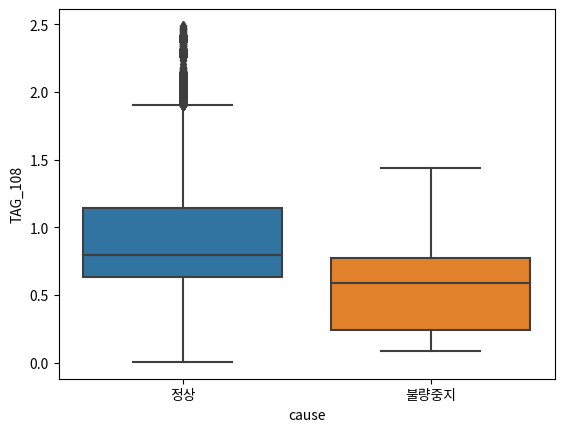

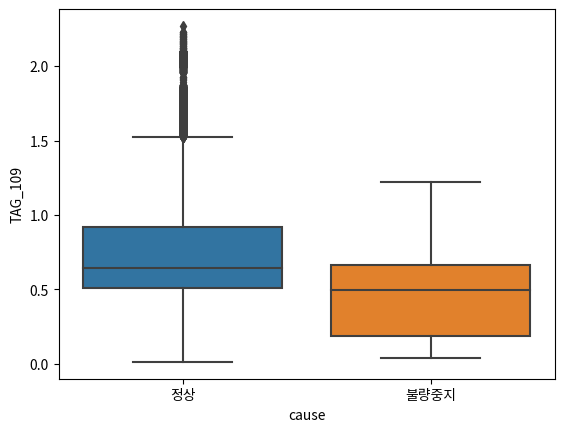

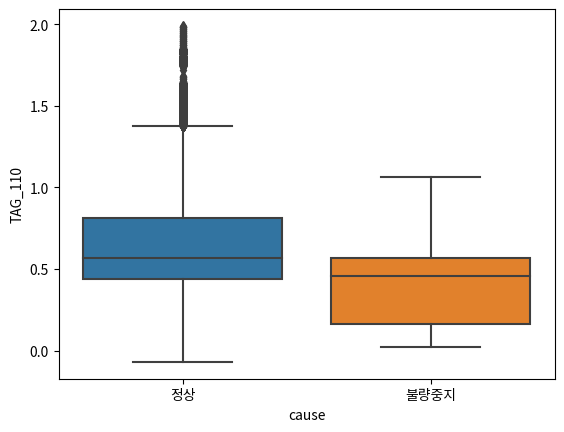

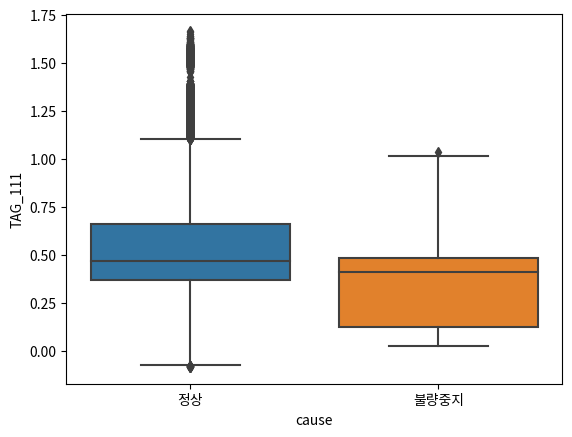

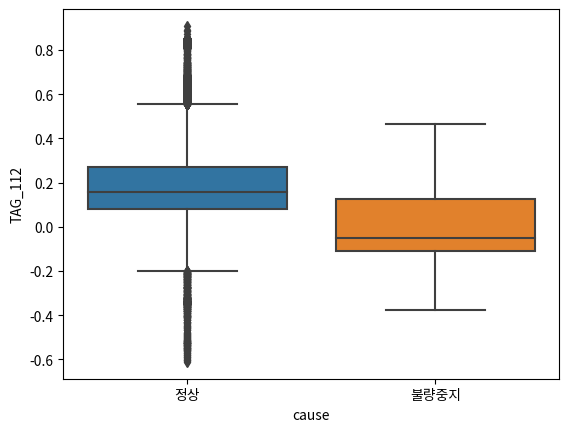

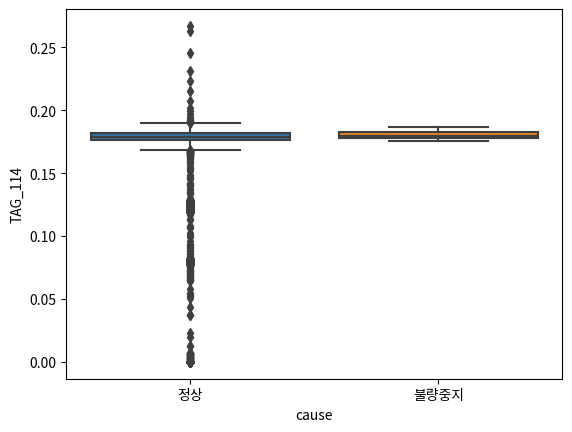

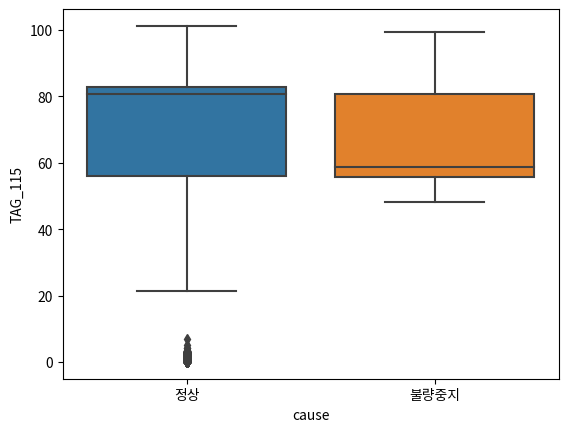

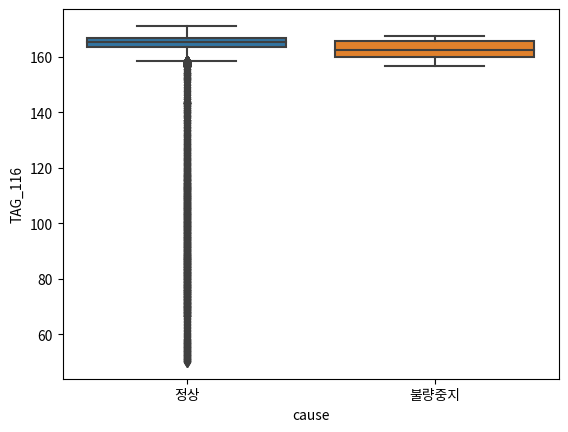

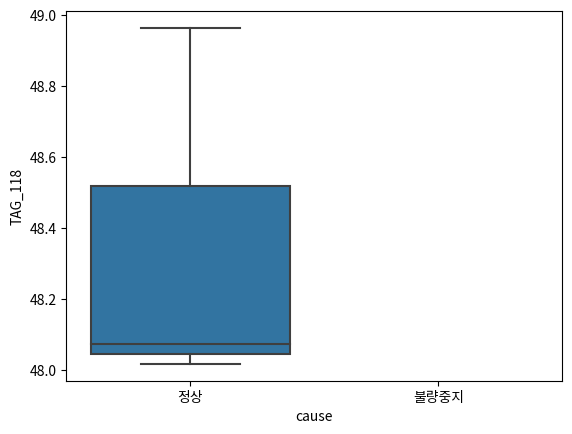

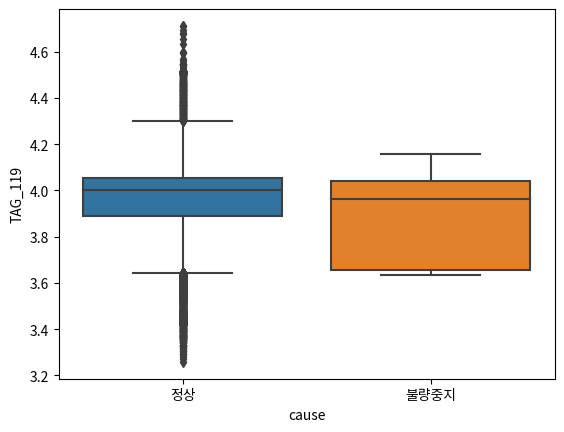

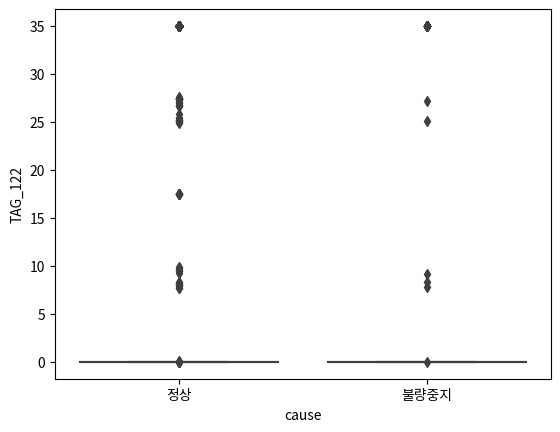

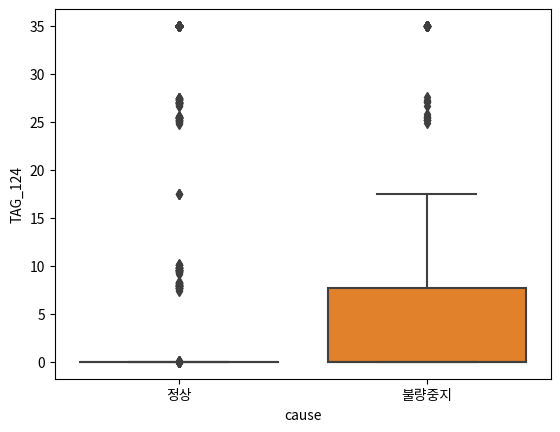

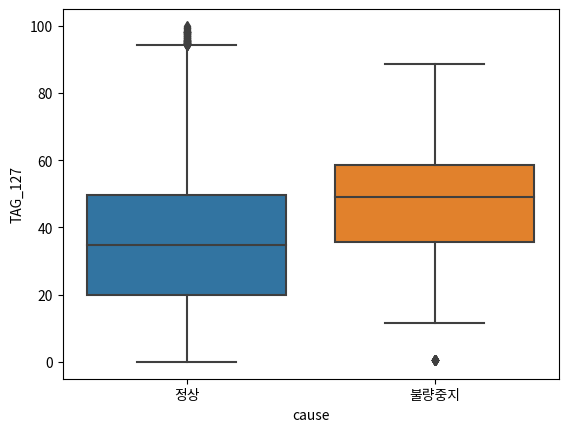

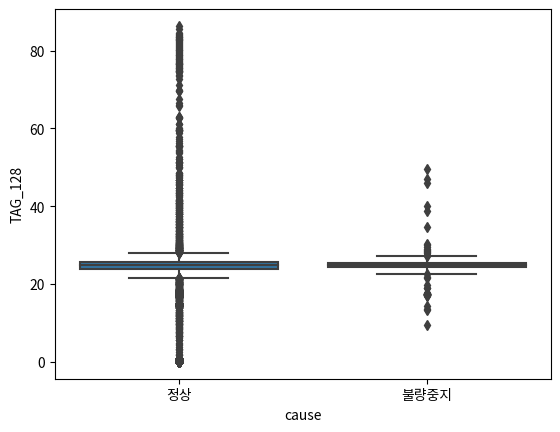

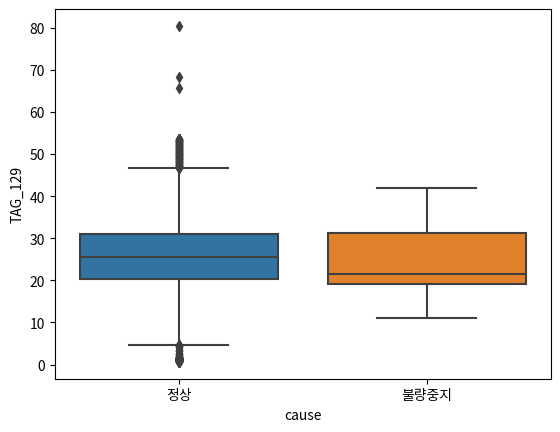

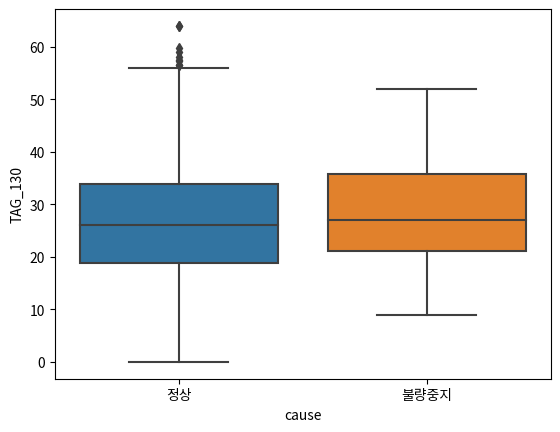

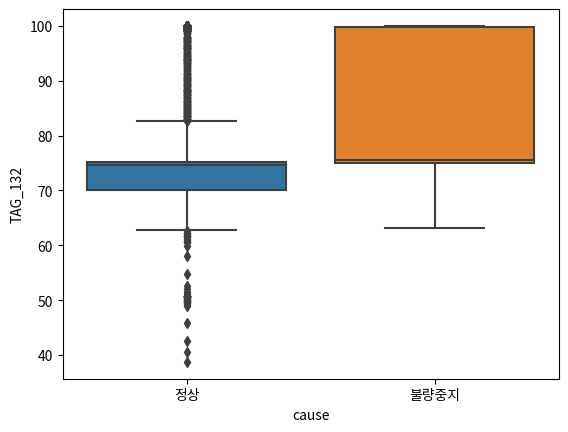

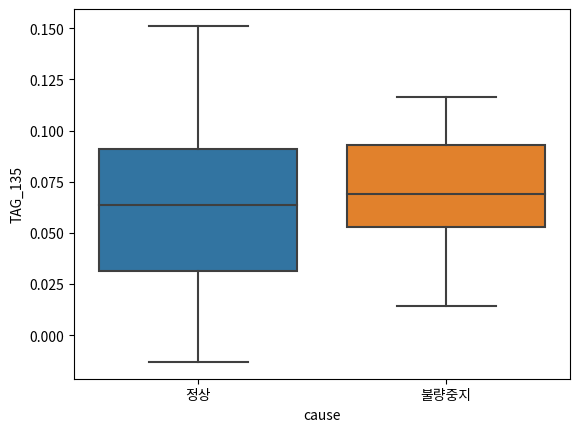

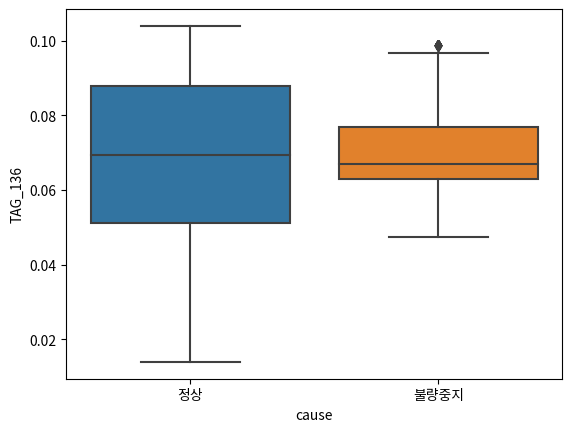

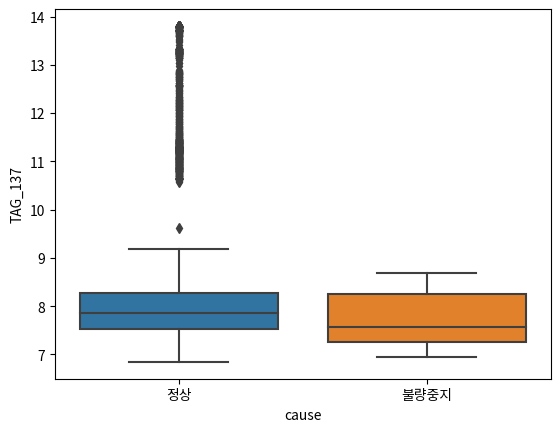

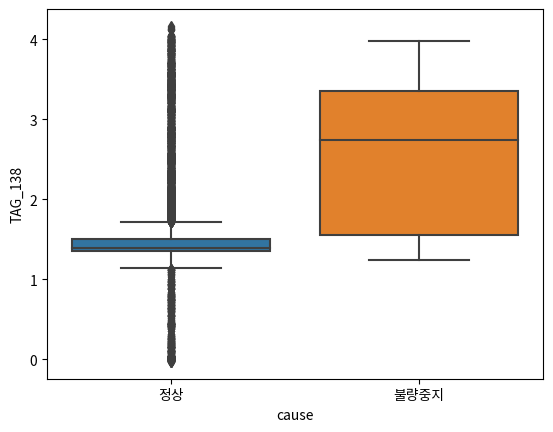

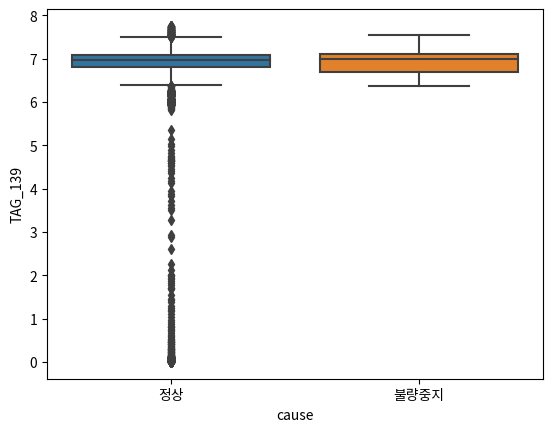

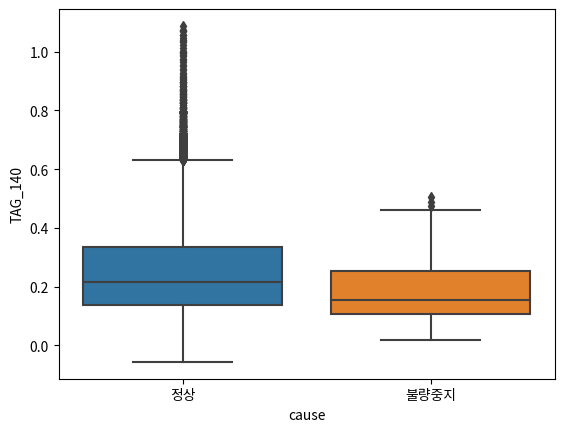

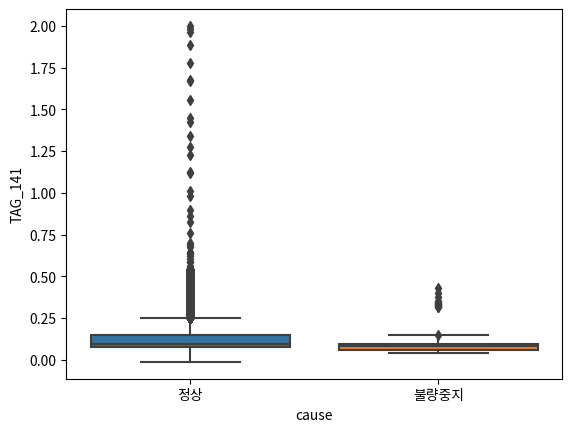

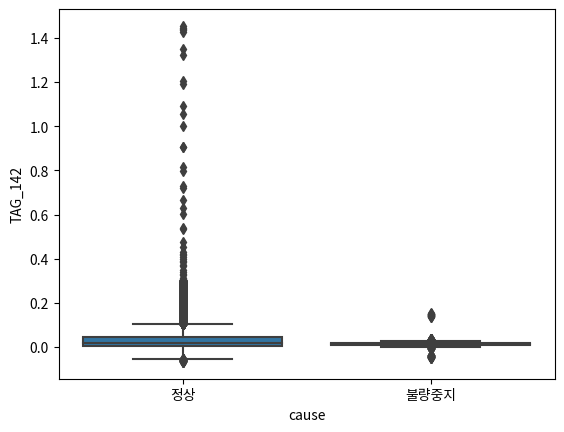

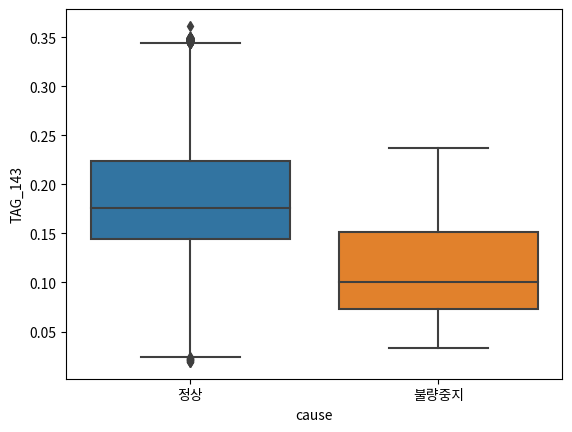

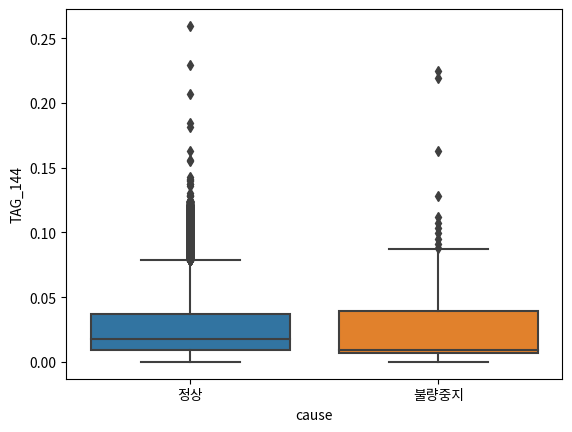

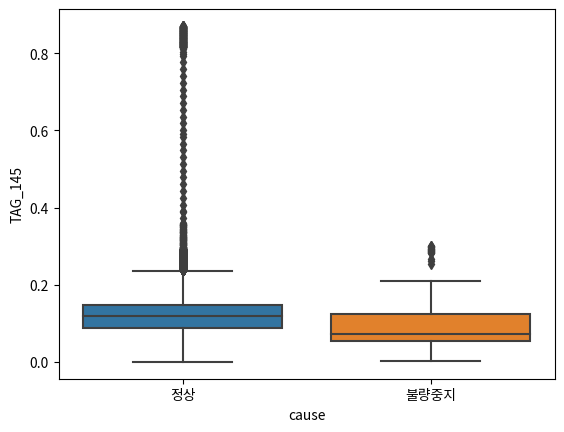

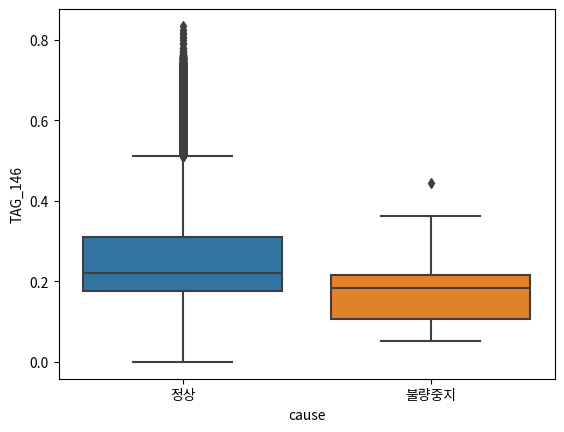

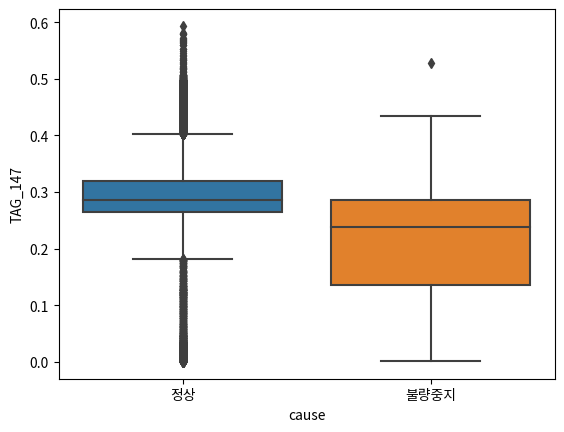

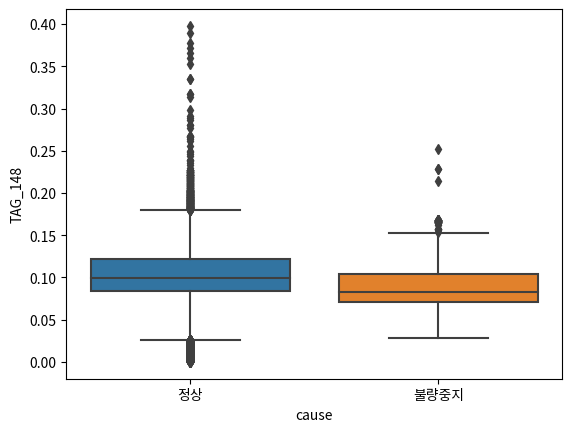

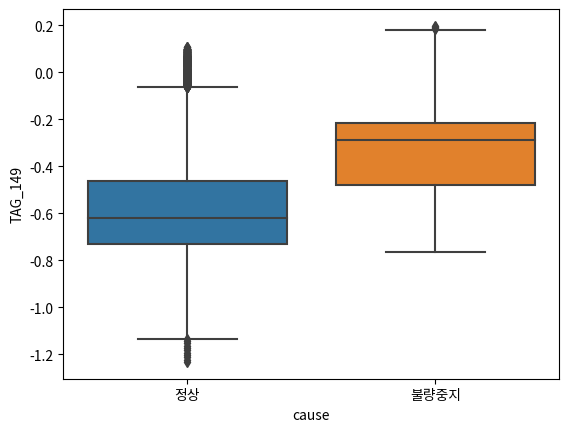

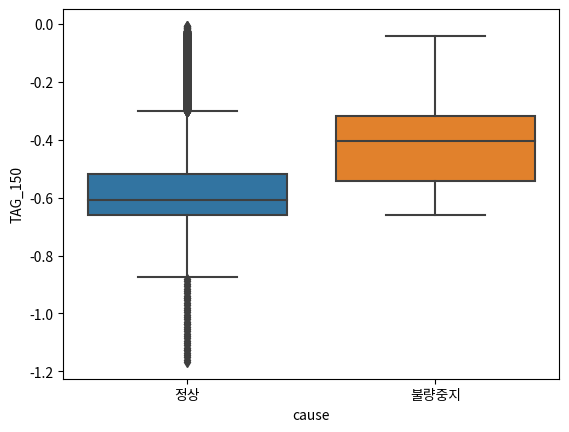

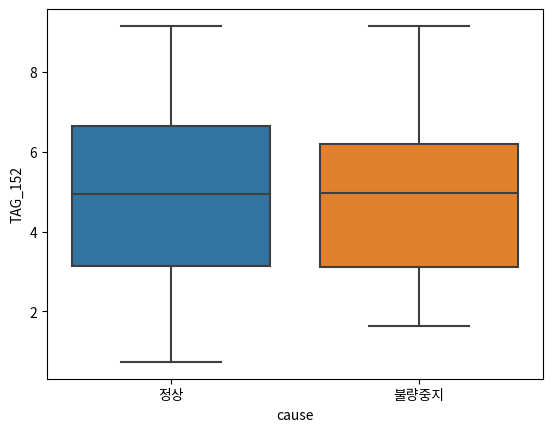

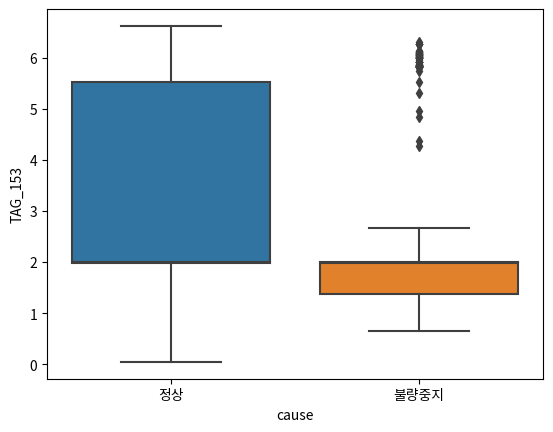

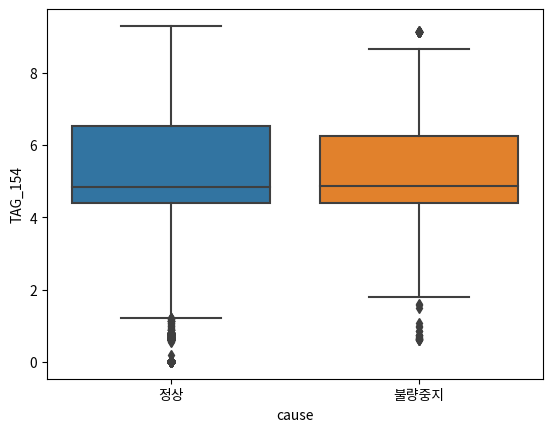

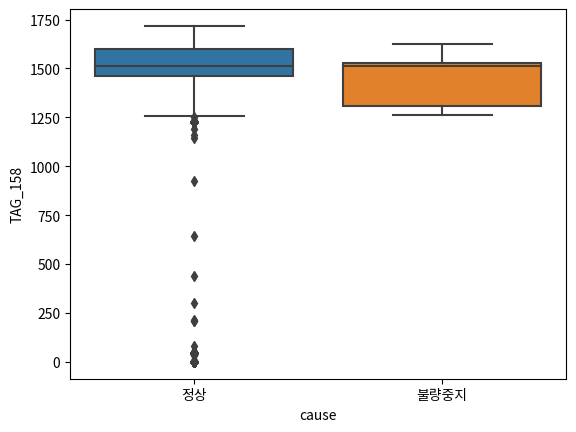

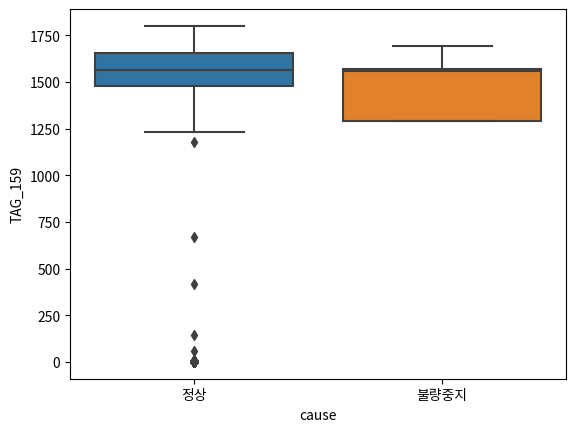

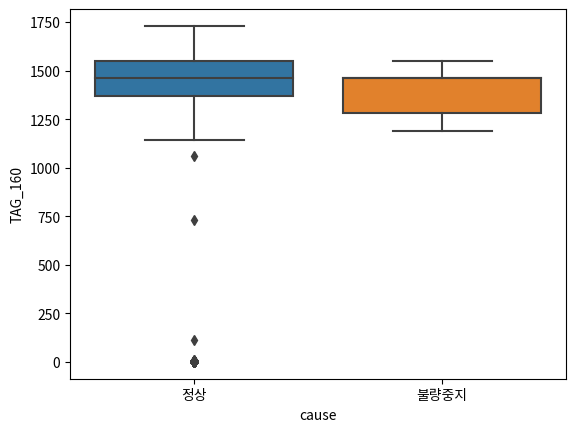

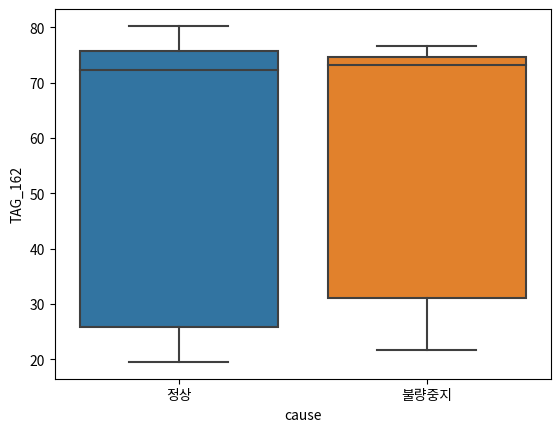

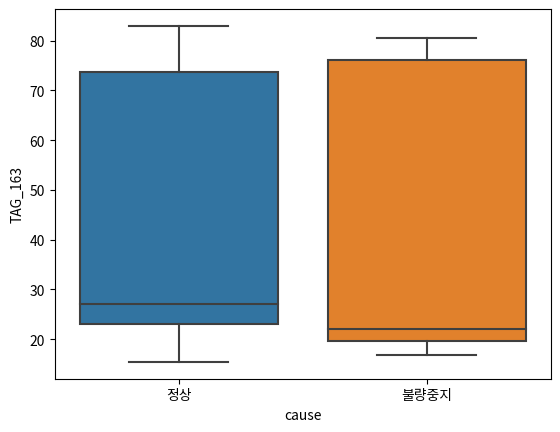

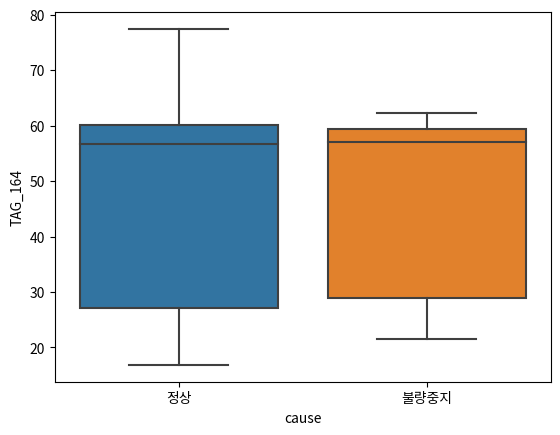

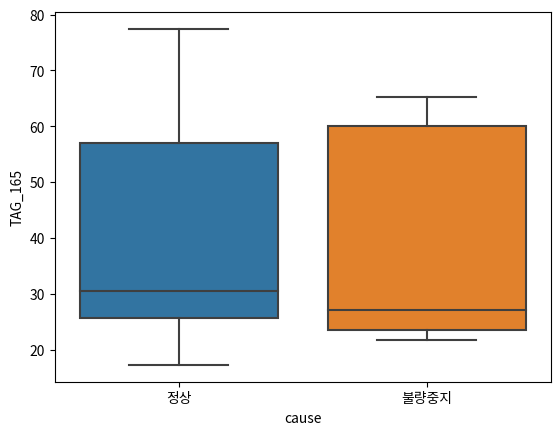

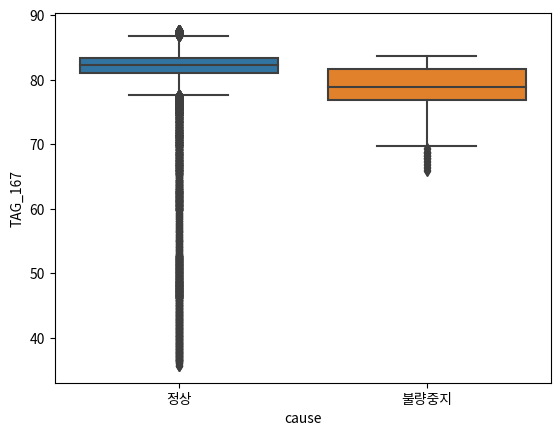

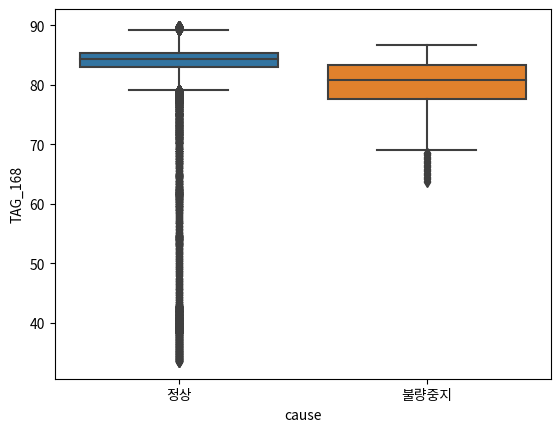

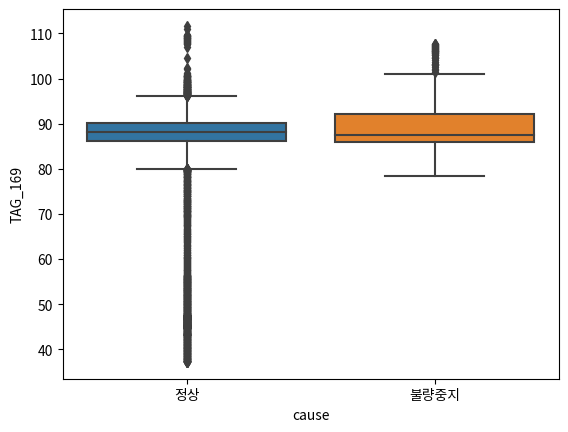

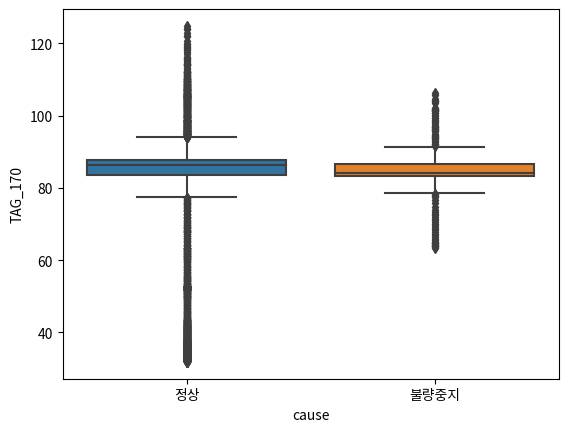

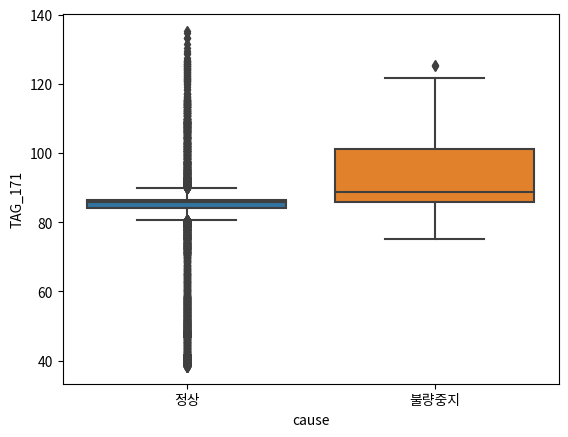

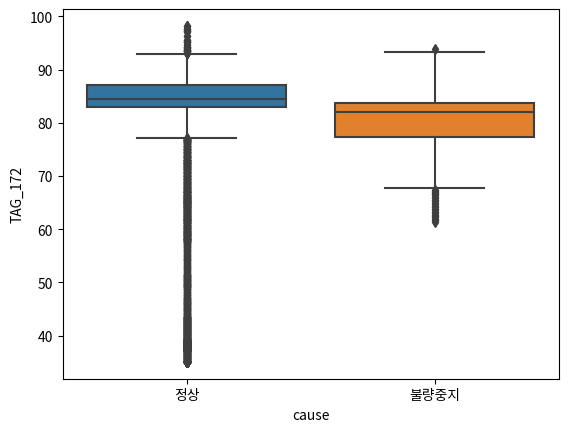

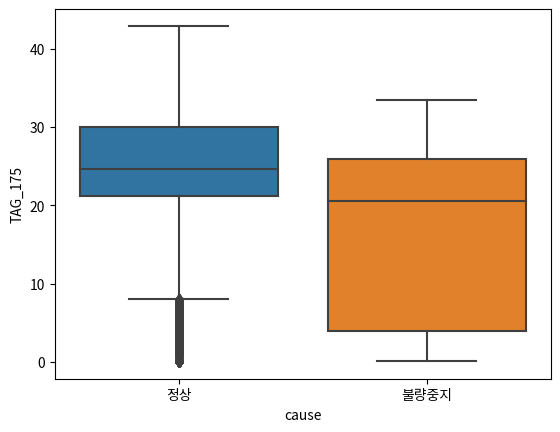

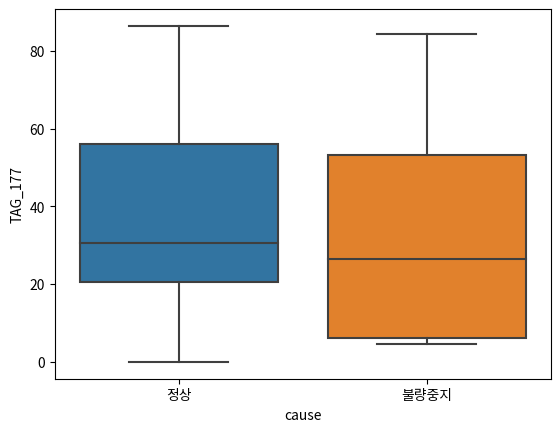

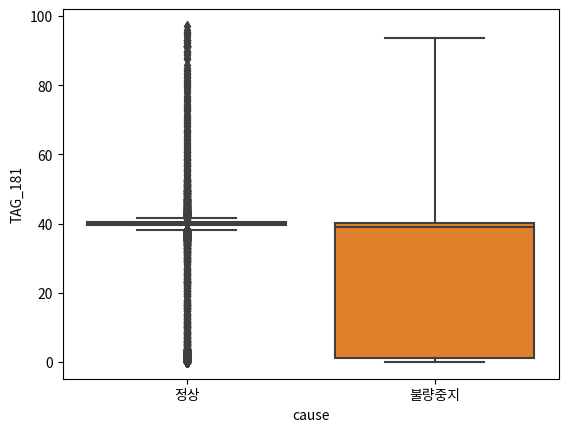

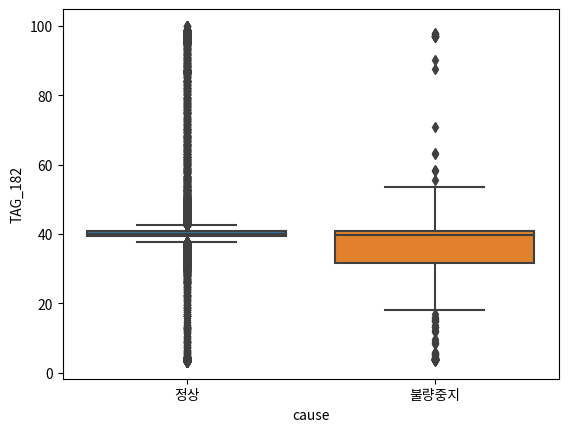

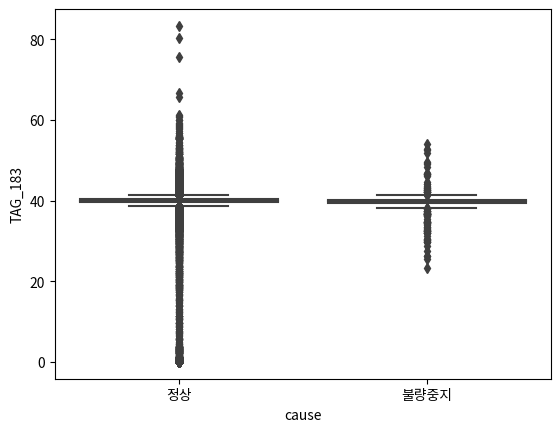

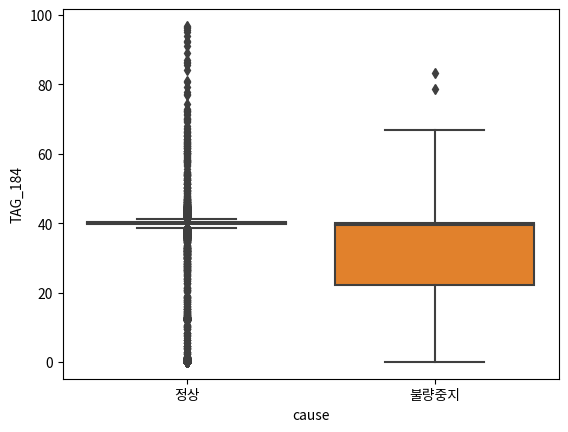

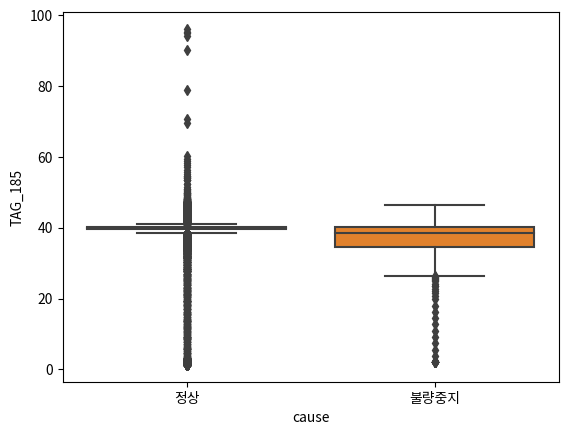

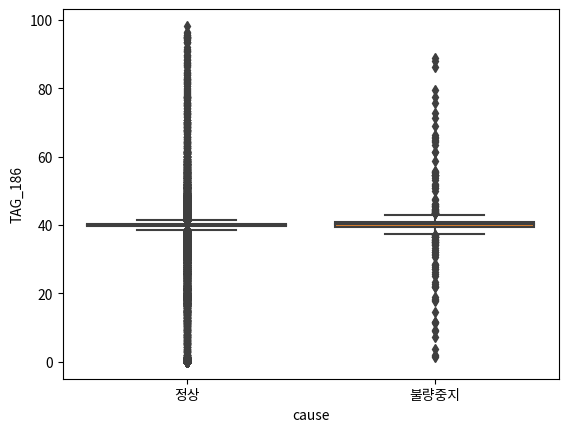

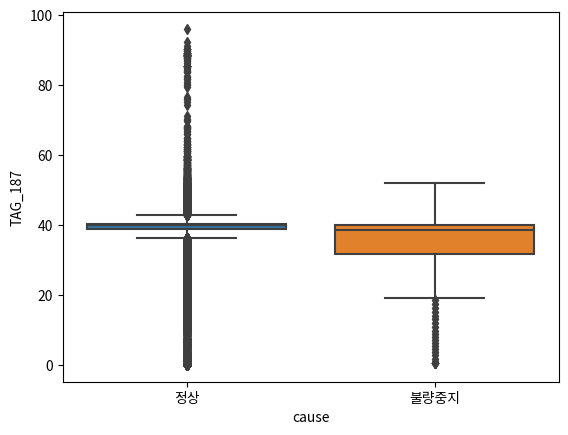

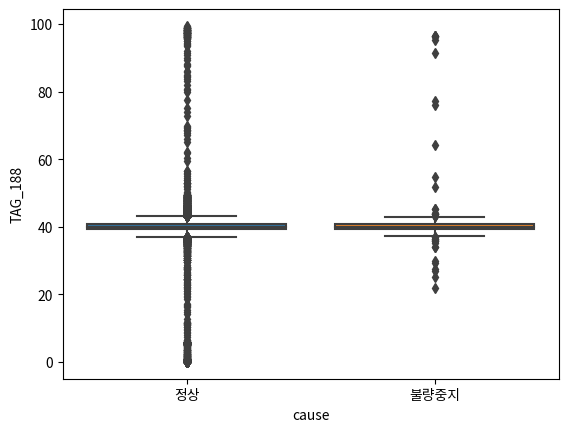

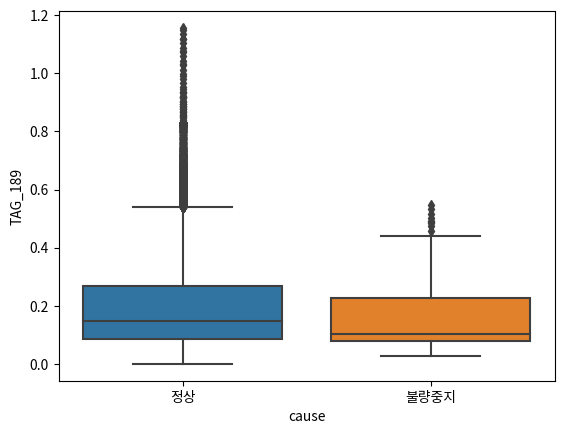

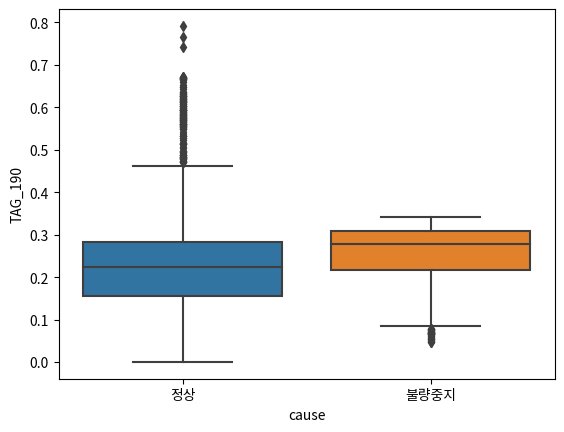

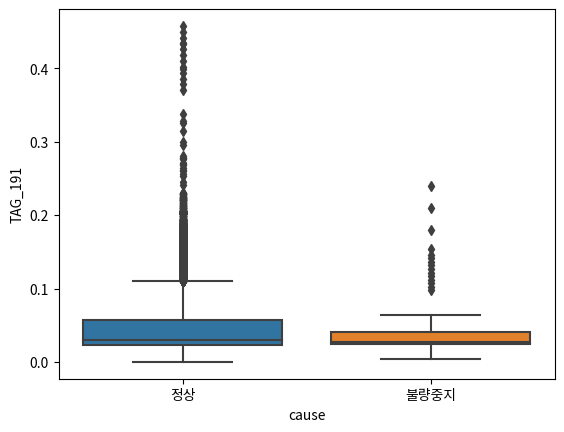

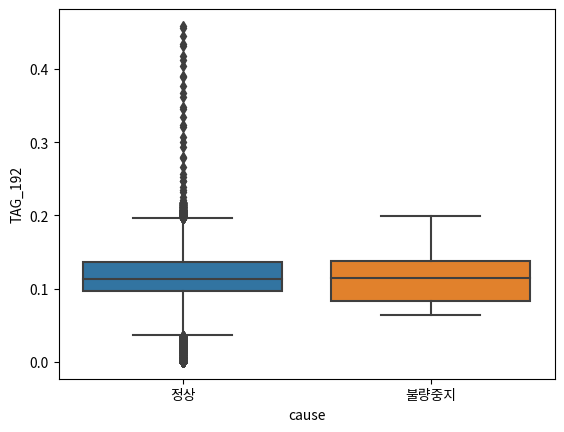

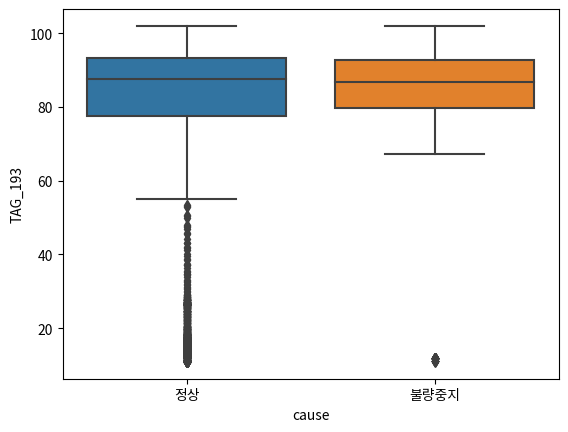

In [13]:
for i in df:
    if i !='datetime' and i!='cause':
        sns.boxplot(df['cause'],df[i])
        plt.show()